## Predicting Sentiment Based on Drug Product User Reviews (Using Real World Data) for Informed Decision Making - Part 2

### Sentiment Analysis Using a Supervised Binary Text Classifier - Utilizing Large Language Models (BERT and XLNet LLMs) and Fine Tuning


## 1. Introduction

A very interesting business application of text classification is sentiment analysis. It is a method to automatically understand the perception of customers towards a product or service based on their comments. The input text is classified into positive, negative, and in some situations, neutral. It is extensively used by companies to track user behavior on social media. Sentiment analysis can strongly influence the marketing strategy of a company, improving the customer experience and defining the advertising roadmap[1].

The evaluation of drug aspects (i.e. side effects, dosage, efficacy etc) heavily relies on randomized controlled trials with rigorous inclusion and exclusion criteria. However, such processes are limited to a small number of individuals enrolled in the study and are constrained to participants in the target population who meet possibly restrictive eligibility criteria, limiting the population representativeness and subsequent study generalizability.

The ramifications of these acclimations could potentially have resulted in the overestimation of the efficacy of the product and misidentification of adverse events/ side effects in the diverse population. Not to mention the heavy costs and time involved. To counter such issues, approaches such as post-marketing drug surveillance have been introduced to optimize the safety of the drug after its regulatory approval and mass production e.g government regulators such as the FDA (US based) or MHRA (UK based) or public/ private organisations to monitor side effects from drugs. Existing methods for identifying adverse events typically focused on analyzing molecular drug composition, query logs, VAERS (Vaccine Adverse Event Reporting System) records, or clinical notes in the medical records.  **However, sentiment or user reviews from consumers were never taken into account.**

Nevertheless, publicly available information on the Internet offers an easily attainable resource that could be leveraged to gain a deep understanding of the drug reviews by the users. Entire user reviews are fully available on drug review websites, on which users can comment on their personal experiences of the drugs they have taken for a specific condition.

Unlike many other forms of medical data, this information is not filtered through medical professionals. Since these reviews are given by anonymous users, there is no risk of patient health record violation for confidentiality. These reviews contain a plethora of information regarding individual experiences associated with the drugs such as symptoms, adverse events, and interactions with other drugs. Such reviews have also contained an extensive amount of user sentiment related to a particular condition, which could be leveraged to detect the side effects and efficacy of drugs[2].


### Objectives

The insights gained through public review (drug user reviews) analysis can influence strategy for better performance.  Automatic analysis of patient posts on forums or social media have received attention in the last few years as a direct source that can help in understanding patients, enhancing the quality of care and increase patient satisfaction. Previously, we had to rely on governing bodies/ trials for feedback on drugs, as stated above[3].

The application of the proposed sentiment analysis approach will be useful not only for patients, but also for drug makers and clinicians to obtain valuable summaries of public opinion. Since sentiment analysis is domain specific, domain knowledge in drug reviews can be incorporated into the sentiment analysis algorithm to provide more accurate analysis. In particular and for example, MetaMap is used to map various health and medical terms (such as disease and drug names) to semantic types in the Unified Medical Language System (UMLS) Semantic Network[4].

Sentiment analysis is the process of measuring automatically the type of opinion, i.e. positive, negative or neutral, expressed in text.

Thus, our objective is to:

Review sentiment based on these drug user reviews text/ dataset, using a supervised binary text classifier, which will classify user reviews as positive or negative. Ultimately this can help us predict the sentiments concerning overall satisfaction of these drugs. Which in turn, can provide valuable insights and help with decision making.

Here, in Part 2, we'll utilize two large language models, BERT and XLNet.

The results (metrics obtained from our classification approach) can determine which text classifier/ model works well, or more specifically, prove the most accurate with our chosen data set.

Even though LLM's don't require pre-processing (refer to summary and conclusion section below), we're still going to clean up our text for the data exploration and analytics steps and for demonstration purposes.


### Dataset

The dataset was retrieved from Kaggle [5]. A platform which allows users to source their data sets and explore/ build upon them (license or rules permitting). The Drug Review Dataset is taken from the UCI Machine Learning Repository. This Dataset provides over 200,000 patient drug reviews on specific drugs along with related conditions and a 10-star patient rating reflecting the overall patient satisfaction. The actual data was scraped from online pharmaceutical review sites.

The license is other.

The data is split into a train (70%) a test (30%) partition (train set consists of 161297 samples, test set consists of 53766 samples of drug reviews) and stored in two .csv (comma-separated-values) files, respectively.

* drugName (categorical): name of drug
* condition (categorical): name of condition
* review (text): patient review
* rating (numerical): 10 star patient rating
* date (date): date of review entry
* usefulCount (numerical): number of users who found review useful

The structure of the data is that a patient with a unique ID purchases a drug that meets their condition and writes a review and rating for the drug he/she purchased on the date. Afterwards, if the others read that review and find it helpful, they will click usefulCount, which will add 1 for the variable.

The size of the training file is 83MB and the associated test set is 27.6MB, hence a total size of 110.6MB. There are 14 columns, 6 of which are string type, 4 are integer type, 2 are DateTime format and 2 are 'other'.  

The dataset was originally published on the UCI Machine Learning repository by Felix Gräßer, Surya Kallumadi, Hagen Malberg, and Sebastian Zaunseder, in 2018. Aspect-Based Sentiment Analysis of Drug Reviews Applying Cross-Domain and Cross-Data Learning. In Proceedings of the 2018 International Conference on Digital Health (DH '18). ACM, New York, NY, USA, 121-125.

The file format is .csv, which is a delimited text file, that uses commas to separate values.

To summarize, this dataset has a good usuability score of 8.8, where it's easy to intepret and includes all the relevant metadata. Hence, after some research, it was evident this is a good quality data set for the topic of text classification in the healthcare arena, more specifically sentiment analysis on drug product reviews.

Techniques, insights, findings, rational and caveats behind the code are presented with Python comments, docstrings and individual summaries below:


### Evaluation Methodology

Given that the review rating is in the range of 1-10,  2 classes were utilised (positive and negative), i.e. this is a supervised binary classification problem. We consider the review to be positive if the rating is higher than 5 (this is a somewhat arbitrary choice, but seems reasonable).

In this case, metrics will be 1) overall accuracy 2) F1 per class 3) F1 macro average.  We are using accuracy (comparing to most frequent class baseline) and F-score for each class. That covers most probable failure modes [6].

How do we evaluate the classifier's performance? One way of evaluating the performance of an algorithm is to measure the accuracy. That is the percentage of correctly classified examples from the total number of samples. And we can do that by:

**F1 per class (F1-score for a binary classifier)**
We would like to summarize the models’ performance into a single metric. That’s where F1-score are used. It’s a way to combine precision and recall into a single number. F1-score is computed using a mean (“average”), but not the usual arithmetic mean. It uses the harmonic mean, which is given by this simple formula:

**F1-score = 2 × (precision × recall)/(precision + recall)**

Similar to arithmetic mean, the F1-score will always be somewhere in between precision and recall. But it behaves differently: the F1-score gives a larger weight to lower numbers. For example, when Precision is 100% and Recall is 0%, the F1-score will be 0%, not 50%. Or for example, say that Classifier A has precision = recall = 80%, and Classifier B has precision = 60%, recall = 100%. Arithmetically, the mean of the precision and recall is the same for both models. But when we use F1’s harmonic mean formula, the score for Classifier A will be 80%, and for Classifier B it will be only 75%. Model B’s low precision score pulled down its F1-score.

As F1 score gives equal weighting to precision and recall, it is perfect for our binary classifer.

**F1 macro average**

The next step is combining the per-class F1-scores into a single number, the classifier’s overall F1-score. There are a few ways of doing that. Let’s begin with the simplest one: an arithmetic mean of the per-class F1-scores. This is called the macro-averaged F1-score, or the macro-F1 for short, and is computed as a simple arithmetic mean of our per-class F1-scores.

Macro F1-score will give the same importance to each label/class. It will be low for models that only perform well on the common classes while performing poorly on the rare classes.

The Macro F1-score is defined as the mean of class-wise/label-wise F1-scores:

$$Macro F1-score = \frac{1}{N} \sum \limits _{i=0} ^{N} F1-score_{i}$$









The metrics are defined by the software packages, sklearn. This is the most popular machine learning package, and it provides the sklearn.metrics.f1_score function, which computes Macro-F1 .

Finally, the F1-score is possibly the most common metric used on imbalanced classification problems, such as our dataset [7].


## Implementation


### Preprocessing


In [ ]:
#!pip install -r requirements.txt

In [2]:
# importing libraries
import pandas as pd, numpy as np
import statistics

# to ignore any warning messages.
import warnings
warnings.filterwarnings('ignore')

# for visualization
import matplotlib
import matplotlib.pyplot as plt, seaborn as sb
import plotly.express as px
import wordcloud

# for unit testing
#from unittest.mock import patch, Mock
#import unittest

#for machine learning
import scipy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


#for text preprocessing
import re
import nltk
import nltk.stem as Stemmer
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
#Stop words present in the nltk library
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

from nltk.tokenize import word_tokenize
#importing the Stemming function from nltk library

from nltk.stem.porter import PorterStemmer
from nltk.stem import porter
from nltk.stem import WordNetLemmatizer
Stemmer=porter.PorterStemmer()


import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 200
%matplotlib inline
import os

#for language detection
#import langdetect

#for sentiment. only used when no training data
#from textblob import TextBlob

#for progress visualization
from tqdm import tqdm
tqdm.pandas()

#for vectorizer
from sklearn import feature_extraction, manifold

#for word embedding
import gensim.downloader as gensim_api

#for topic modeling
import gensim

#dealing with date feature
from datetime import datetime

# for error handling
from traceback import format_exc

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
#import datasets via dropbox storage
!wget https://www.dropbox.com/s/wd35fbl314kcv6f/drugsComTest_raw.csv?dl=1
!wget https://www.dropbox.com/s/a7n2c8wtm9hu72w/drugsComTrain_raw.csv?dl=1

--2023-10-12 10:15:31--  https://www.dropbox.com/s/wd35fbl314kcv6f/drugsComTest_raw.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/wd35fbl314kcv6f/drugsComTest_raw.csv [following]
--2023-10-12 10:15:31--  https://www.dropbox.com/s/dl/wd35fbl314kcv6f/drugsComTest_raw.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8f953e38ba45485992ef3d1e1e.dl.dropboxusercontent.com/cd/0/get/CFdMHgiBiGKG3OrbmohGcY4YyswxEwWj7jkGnfcwUwRxGXsG8N1MtGvh59FTotr0aN7B4gjaL9gOdbYmUpzmcvSpu9gU6xkPgBh-tnCf9jDimCG_zY8d0De3ultEoLATBZybIK8BMNoHNqie0bav1hA5/file?dl=1# [following]
--2023-10-12 10:15:31--  https://uc8f953e38ba45485992ef3d1e1e.dl.dropboxusercontent.com/cd/0/get/CFdMHgiBiGKG3OrbmohGcY4YyswxEwWj7jkGnfcwUwRxGXsG8N1MtGvh59FTotr0aN7B4gjaL

In [4]:
#first, check we're using the right file type/encoder i.e. it should be UTF-8
#this ensures, it's relatively clean, and can be read and organised (as opposed to some other unusable formats)
import pandas as pd
import csv
train = open('drugsComTrain_raw.csv?dl=1', 'r')
test = open('drugsComTest_raw.csv?dl=1', 'r')
train

<_io.TextIOWrapper name='drugsComTrain_raw.csv?dl=1' mode='r' encoding='UTF-8'>

In [5]:
#we have the correct file encoder, as stated in the above output
#now, import the datasets and read the training set

#import csv
#train=pd.read_csv('drugsComTrain_raw.csv')#no sentiment lexicons required (manually curated wordlists),
#as we have plenty of training data here - scraped from drug user review websites
#test=pd.read_csv('drugsComTest_raw.csv')

import csv
train=pd.read_csv('drugsComTrain_raw.csv?dl=1')
test=pd.read_csv('drugsComTest_raw.csv?dl=1')

train.head().append(train.tail())

uniqueID                  drugName                     condition  \
0         206461                 Valsartan  Left Ventricular Dysfunction   
1          95260                Guanfacine                          ADHD   
2          92703                    Lybrel                 Birth Control   
3         138000                Ortho Evra                 Birth Control   
4          35696  Buprenorphine / naloxone             Opiate Dependence   
161292    191035                   Campral            Alcohol Dependence   
161293    127085            Metoclopramide               Nausea/Vomiting   
161294    187382                   Orencia          Rheumatoid Arthritis   
161295     47128        Thyroid desiccated           Underactive Thyroid   
161296    215220              Lubiprostone         Constipation, Chronic   

                                                                                                                                                                                                         review  \
0                                                                                                                               "It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"   
1       "My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get ou...   
2       "I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not ava...   
3       "This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is...   
4       "Suboxone has completely turned my life around.  I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account.  I had none of those before Suboxone an...   
161292  "I wrote my first report in Mid-October of 2014.  I have not had any alcohol at all since that post, have reduced my dosage to 1 pill first thing in the morning.  I am a very social person, and en...   
161293  "I was given this in IV before surgey. I immediately became anxious and could not sit still . The PA said &quot;oh yes this happens sometimes&quot;. They had to give me Benadryl to calm me down. I...   
161294                                                                                                          "Limited improvement after 4 months, developed bad rash and MD refused to continue medication."   
161295  "I&#039;ve been on thyroid medication 49 years, I spent my first 38 on Synthroid and various t4 formulas, I could not stand the up and down of Synthroid, it never was steady. Every time I went to ...   
161296  "I&#039;ve had chronic constipation all my adult life. Tried Linzess, it worked for a month then stopped. Doctor started me on Amitiza (24 mg) and it is a miracle. I&#039;ve been on for four month...   

        rating       date  usefulCount  
0            9  20-May-12           27  
1            8  27-Apr-10          192  
2            5  14-Dec-09           17  
3            8   3-Nov-15           10  
4            9  27-Nov-16           37  
161292      10  31-May-15          125  
161293       1   1-Nov-11           34  
161294       2  15-Mar-14           35  
161295      10  19-Sep-15           79  
161296       9  13-Dec-14          116

In [ ]:
#as both datasets contain the same columns, we can then combine them for efficient preprocessing and
#better analysis
data = pd.concat([train, test])
data.head()

uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                                                                                                                                                                                    review  \
0                                                                                                                          "It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"   
1  "My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get ou...   
2  "I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not ava...   
3  "This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is...   
4  "Suboxone has completely turned my life around.  I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account.  I had none of those before Suboxone an...   

   rating       date  usefulCount  
0       9  20-May-12           27  
1       8  27-Apr-10          192  
2       5  14-Dec-09           17  
3       8   3-Nov-15           10  
4       9  27-Nov-16           37

In [ ]:
#Let's check the number of rows and columns
data.shape

(215063, 7)

In [ ]:
#Let's check for missing values (Nan)
#From above output, we have 7 columns
data.isnull().sum()

uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

In [ ]:
#lets create a data type function for displaying null values and data types [7]
def finding_null_value(data):

    total_null = data.isnull().sum()

    total_percent = (data.isnull().sum()/data.isnull().count()*100)


    new_var = pd.concat([total_null, total_percent], axis=1, keys=['Total_null', 'Total_percent(%)'])


    types_array = []
    for column in data.columns:
        dtype = str(data[column].dtype)
        types_array.append(dtype)
    new_var['Types'] = types_array

    return(np.transpose(new_var))

In [ ]:
#The data type function displays:
# 1. Total null values
# 2. Total percentage
# 3. Display types of every feature (don't need to use Dtypes command, however, we'll still demonstrate below)
finding_null_value(data)

uniqueID drugName condition  review rating    date  \
Total_null              0        0      1194       0      0       0   
Total_percent(%)      0.0      0.0  0.555186     0.0    0.0     0.0   
Types               int64   object    object  object  int64  object   

                 usefulCount  
Total_null                 0  
Total_percent(%)         0.0  
Types                  int64

In [ ]:
# calculating the number of rows dropped due to null conditions
#'condition' is a critical feature and a string, hence we cannot replace with a mean or frequency
# we must then drop these rows where 'condition' is a null/NaN value
data.dropna(subset=["condition"], axis=0, inplace=True)


# reset index, because we droped 1194 rows
# resetting the index to avoid errors, if accessing rows by their indexes
data.reset_index(drop=True, inplace=True)
data


uniqueID                  drugName                     condition  \
0         206461                 Valsartan  Left Ventricular Dysfunction   
1          95260                Guanfacine                          ADHD   
2          92703                    Lybrel                 Birth Control   
3         138000                Ortho Evra                 Birth Control   
4          35696  Buprenorphine / naloxone             Opiate Dependence   
...          ...                       ...                           ...   
213864    159999                 Tamoxifen     Breast Cancer, Prevention   
213865    140714              Escitalopram                       Anxiety   
213866    130945            Levonorgestrel                 Birth Control   
213867     47656                Tapentadol                          Pain   
213868    113712                 Arthrotec                      Sciatica   

                                                                                                                                                                                                         review  \
0                                                                                                                               "It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"   
1       "My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get ou...   
2       "I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not ava...   
3       "This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is...   
4       "Suboxone has completely turned my life around.  I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account.  I had none of those before Suboxone an...   
...                                                                                                                                                                                                         ...   
213864  "I have taken Tamoxifen for 5 years. Side effects are severe sweating and depression. I have been taking Effexor XR longer than I have been on Tamoxifen. My Oncologist increased the Effexor dosage...   
213865  "I&#039;ve been taking Lexapro (escitaploprgram) since February. First, I&#039;d like to mention that you can NOT take this drug for a week or less and expect to magically feel better; I felt real...   
213866  "I&#039;m married, 34 years old and I have no kids. Taking the pill was such a hassle so I decided to get the Mirena. It was very painful when it was inserted,then had cramping for the rest of tha...   
213867  "I was prescribed Nucynta for severe neck/shoulder pain. After taking only 2, 75mg pills I was rushed to the ER with severe breathing problems. I have never had any issues with pain medicines befo...   
213868                                                                                                                                                                                            "It works!!!"   

        rating       date  usefulCount  
0            9  20-May-12           27  
1            8  27-Apr-10          192  
2            5  14-Dec-09           17  
3            8   3-Nov-15           10  
4            9  27-Nov-16           37  
...        ...        ...          ...  
213864      10  13-Sep-14           43  
213865       9   8-Oct-16           11  
213866       8  15-Nov-10            7  
213867       1  28-Nov-11           20  
213868       9  13-Sep-09           46  

[213869 rows x 7 columns]

In [ ]:
#let's check data types

#This gives us an extra step to check that there's no mistakes or no unexpected values in our data.

#This extra step is very useful for plotting as well, because if we plot an ordinal variable, Pandas and
#Matplotlib will obey this natural ordering of the values, whereas if we didn't do that, the visualization would
#tend to be sorted alphabetically, which can make things very confusing. This early stage of pre-processing
#definitely gives us some benefits when it comes to visualization[7].

data.dtypes

uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

In [ ]:
#let's first modify drugName, condition and review to category
#Set the nominal (non-ordered categorical) data types from object to category type

data['drugName']=data['drugName'].astype('category')
data['condition']=data['condition'].astype('category')
data['review']=data['review'].astype('category')
data.dtypes

uniqueID          int64
drugName       category
condition      category
review         category
rating            int64
date             object
usefulCount       int64
dtype: object

In [ ]:
#then modify date object to string
data['date']=data['date'].astype('string')

In [ ]:
#We can see below, the specified objects that were once object, have now been transformed into the correct category

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213869 entries, 0 to 213868
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   uniqueID     213869 non-null  int64   
 1   drugName     213869 non-null  category
 2   condition    213869 non-null  category
 3   review       213869 non-null  category
 4   rating       213869 non-null  int64   
 5   date         213869 non-null  string  
 6   usefulCount  213869 non-null  int64   
dtypes: category(3), int64(3), string(1)
memory usage: 13.4 MB


In [ ]:
#quick and dirty summary statistics

data.describe(include='all')

uniqueID        drugName      condition  review         rating  \
count   213869.000000          213869         213869  213869  213869.000000   
unique            NaN            3667            916  128449            NaN   
top               NaN  Levonorgestrel  Birth Control  "Good"            NaN   
freq              NaN            4896          38436      39            NaN   
mean    116076.924786             NaN            NaN     NaN       6.991149   
std      67016.705794             NaN            NaN     NaN       3.275792   
min          0.000000             NaN            NaN     NaN       1.000000   
25%      58122.000000             NaN            NaN     NaN       5.000000   
50%     115972.000000             NaN            NaN     NaN       8.000000   
75%     174018.000000             NaN            NaN     NaN      10.000000   
max     232291.000000             NaN            NaN     NaN      10.000000   

            date    usefulCount  
count     213869  213869.000000  
unique      3579            NaN  
top     1-Mar-16            NaN  
freq         185            NaN  
mean         NaN      28.094118  
std          NaN      36.401377  
min          NaN       0.000000  
25%          NaN       6.000000  
50%          NaN      16.000000  
75%          NaN      36.000000  
max          NaN    1291.000000



- The top drugName is Levonorgestrel, hence a very popular choice. Delving deeper, Levonorgestrel is used to treat many conditions
- The top condition is Birth Control.
- The top review is just a single word "Good", but it has very small count. Only 39.
- Most single day reviews came on 1-Mar-16. This date can be investigated further, and review which drugName and which conditions these reviews were for.

In [ ]:
#perform deeper EDA
#preparing a separate DataFrame for analysis
data_explorer= data

# dropping some columns
data_explorer.drop(columns = ['usefulCount'], inplace = False)

# sorting rows in descending order of rating
data_explorer = data_explorer.sort_values('rating', ascending = False)

data_explorer.head()

uniqueID  drugName                                    condition  \
106934    132527   Doxepin                     Irritable Bowel Syndrome   
55269     151385   Chantix                            Smoking Cessation   
55267      24899    Deplin  41</span> users found this comment helpful.   
136264     52152  Adipex-P                                      Obesity   
136268    126034   Viibryd                                   Depression   

                                                                                                                                                                                                         review  \
106934  "Had symptoms of IBS D for years, after a bout with a bad colon infection. Following many tests, medication trials that all failed, a great GI specialist suggested doxepin, it was a miracle.  Try ...   
55269   "I&#039;m 62 years old and had been smoking since I was 12. For financial and health reasons decided it was time to quit. With the help of Chanix, I was able to quit after 3 weeks on the medicatio...   
55267   "I never responded to any medication for anxiety and depression, which was made worse by most medications. Deplin was a miracle for me. I started to use it this summer and my response was immediat...   
136264  "The first week I took Adipex I lost 10 pounds, it helped that I ran every morning but I was always edgy. I would work work work and had no desire to eat. Best diet pill so far. I&#039;ve read tha...   
136268  "Giving it a 10 after only 3 days might sound odd but comparing to other meds I have been on, it&#039;s a 10.  I was on Lexapro 20mg and Wellbutrin for a year and a half.  Stopped the meds cold tu...   

        rating       date  usefulCount  
106934      10  23-May-16           12  
55269       10  18-Dec-16           23  
55267       10   7-Dec-10           41  
136264      10   2-Jun-11           44  
136268      10   3-Oct-13           54

In [ ]:
#ensure all unique ID's reflect actual number of rows from above dataframe (not including missing values)
#this tells us we don't have duplicate patients (unique ID's)
#213,869 is the correct output

#check uniqueID
data_explorer['uniqueID'].nunique()

213869

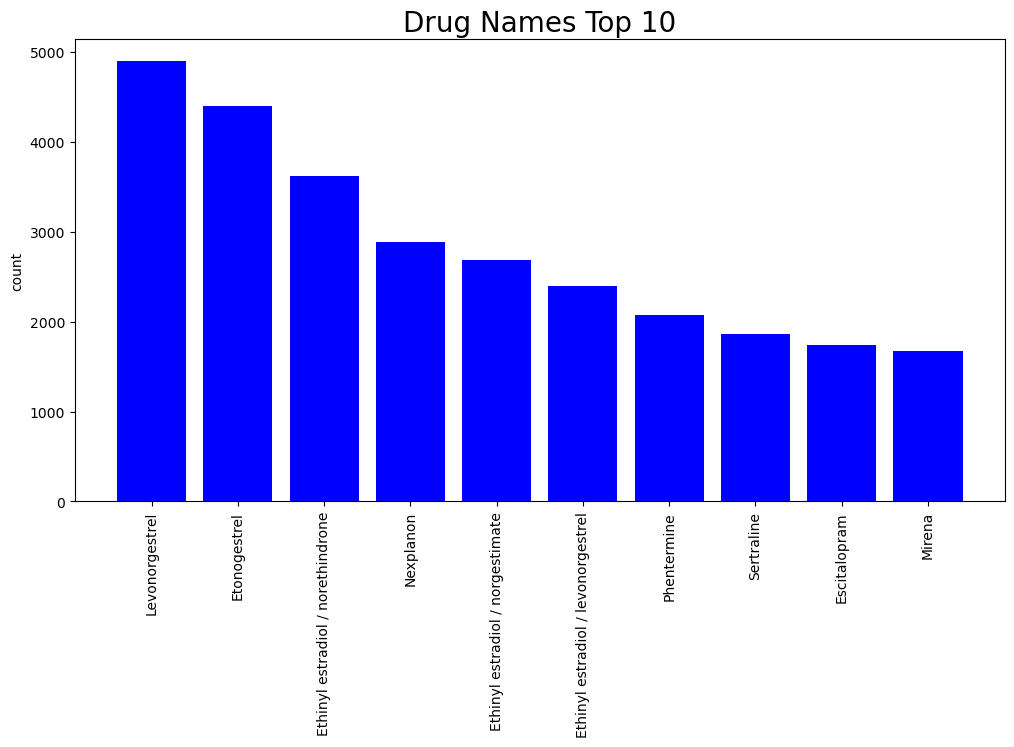

In [ ]:
#plot a bargraph to check top 10 drugnames

#from bargraph below, we can see that:
#Levonorgestrel - Around 4,800 patients are taking this medication, the most popular drug here
#Over 3000 patients are taking the top 3 drugs

#The top 3 drugName has count around 4000 and above.
#Most of the drugName counts are around 1500 if we look at top 10

plt.figure(figsize=(12,6))
drug_top = data_explorer['drugName'].value_counts(ascending = False).head(10)

plt.bar(drug_top.index,drug_top.values,color='blue')
plt.title('Drug Names Top 10',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

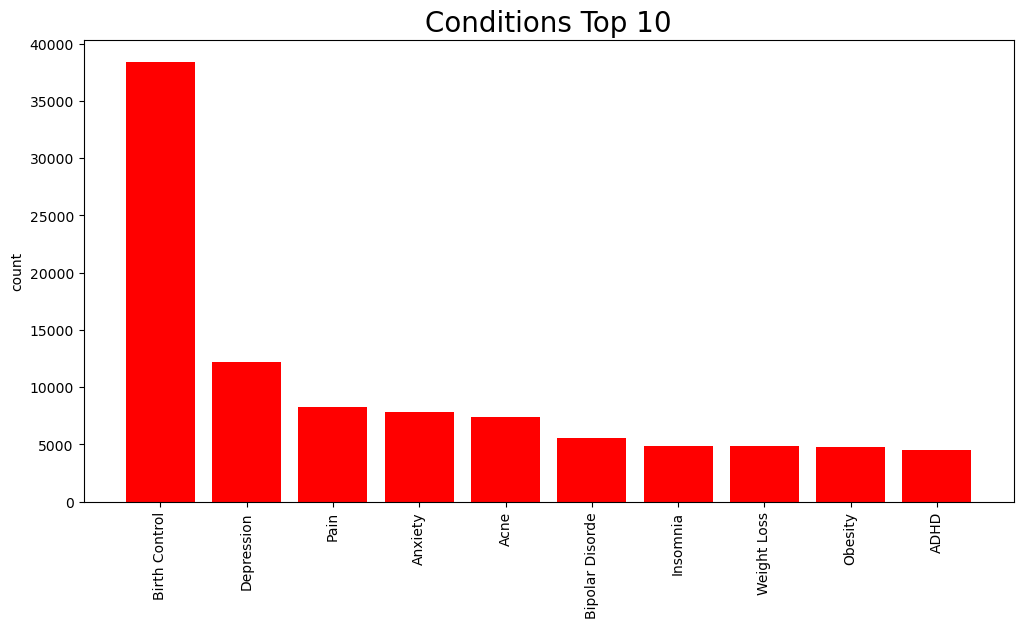

In [ ]:
#plot a bargraph to check top 10 conditions

#from bargraph below, we can see that:
#Birth control - Between 35,000 to 40,000 patients have birth control conditions, the most popular condition here
#Approximately 3-7 times more popular than any of the other conditions
#Most of the conditions for the top 10 are between 5000 - 10,000

plt.figure(figsize=(12,6))
cond_top = data_explorer['condition'].value_counts(ascending = False).head(10)

plt.bar(cond_top.index,cond_top.values,color='red')
plt.title('Conditions Top 10',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

In [ ]:
#check counts for ratings
#from the output below, rating '10'/ top rating produces the majority of the counts

ratings_ = data_explorer['rating'].value_counts().sort_values(ascending=False).reset_index().\
                    rename(columns = {'index' :'rating', 'rating' : 'counts'})
ratings_['percent'] = 100 * (ratings_['counts']/data_explorer.shape[0])
print(ratings_)

   rating  counts    percent
0      10   67682  31.646475
1       9   36499  17.066054
2       1   28769  13.451692
3       8   24909  11.646849
4       7   12470   5.830672
5       5   10650   4.979684
6       2    9203   4.303101
7       3    8662   4.050143
8       6    8403   3.929041
9       4    6622   3.096288


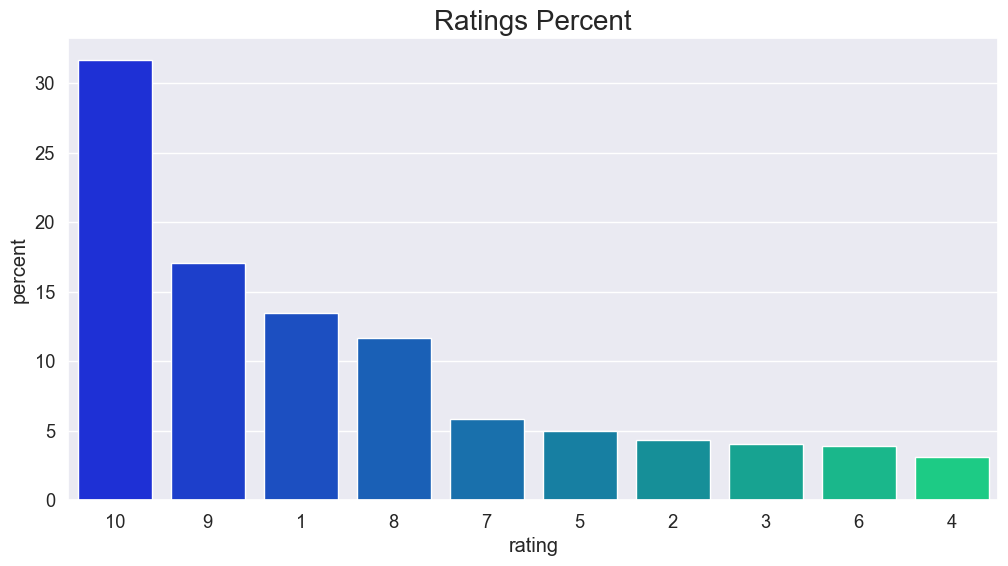

In [ ]:
#as a percentage, this top ten rating produces just over 30%, or approximately a third of the counts

sb.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [12, 6]

#let's plot and check
sb.barplot(x = ratings_['rating'], y = ratings_['percent'],order = ratings_['rating'], palette='winter')
plt.title('Ratings Percent',fontsize=20)
plt.show()

In [ ]:
#lets check the number of drugs per condition

#we can see from the output below, there's 219 drugs linked to treating pain
#however, there are 253 drugs (highest amount) linked to 'not listed/ other' conditions.

#it may be possible that specific users didn't mention their condition, for privacy reasons. We can look up the
#drug names and fill up the conditions for which that drug is used.

#there's possibly noise present in our dataset, possibly due to webscraping where the values are wrongly fed in here.

data_explorer.groupby('condition')['drugName'].nunique().sort_values(ascending=False).head(10)

condition
Not Listed / Othe       253
Pain                    219
Birth Control           181
High Blood Pressure     146
Acne                    127
Depression              115
Rheumatoid Arthritis    107
Diabetes, Type 2         97
Allergic Rhinitis        95
Insomnia                 85
Name: drugName, dtype: int64

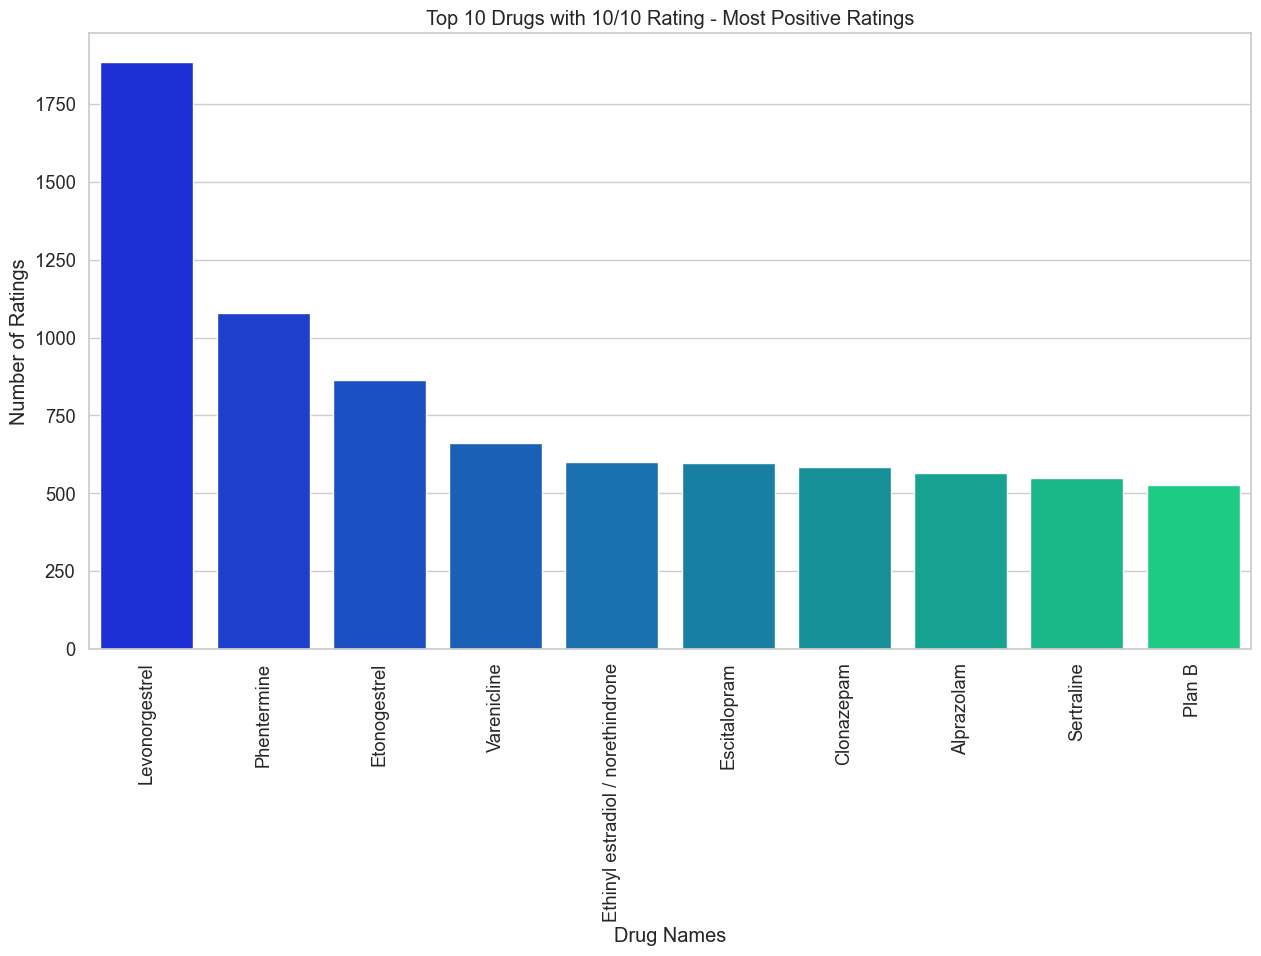

In [ ]:
#the barplot below shows the top 10 drugs with the '10/10' rating which basically shows us which drugs have received
#majorly positive ratings and reviews

sb.set(font_scale = 1.2, style = 'whitegrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sb.barplot(x = drugname[0:10], y = drug_rating[0:10], palette = 'winter')

sns_rating.set(title = 'Top 10 Drugs with 10/10 Rating - Most Positive Ratings', ylabel = 'Number of Ratings', xlabel = "Drug Names")

plt.setp(sns_rating.get_xticklabels(), rotation=90);

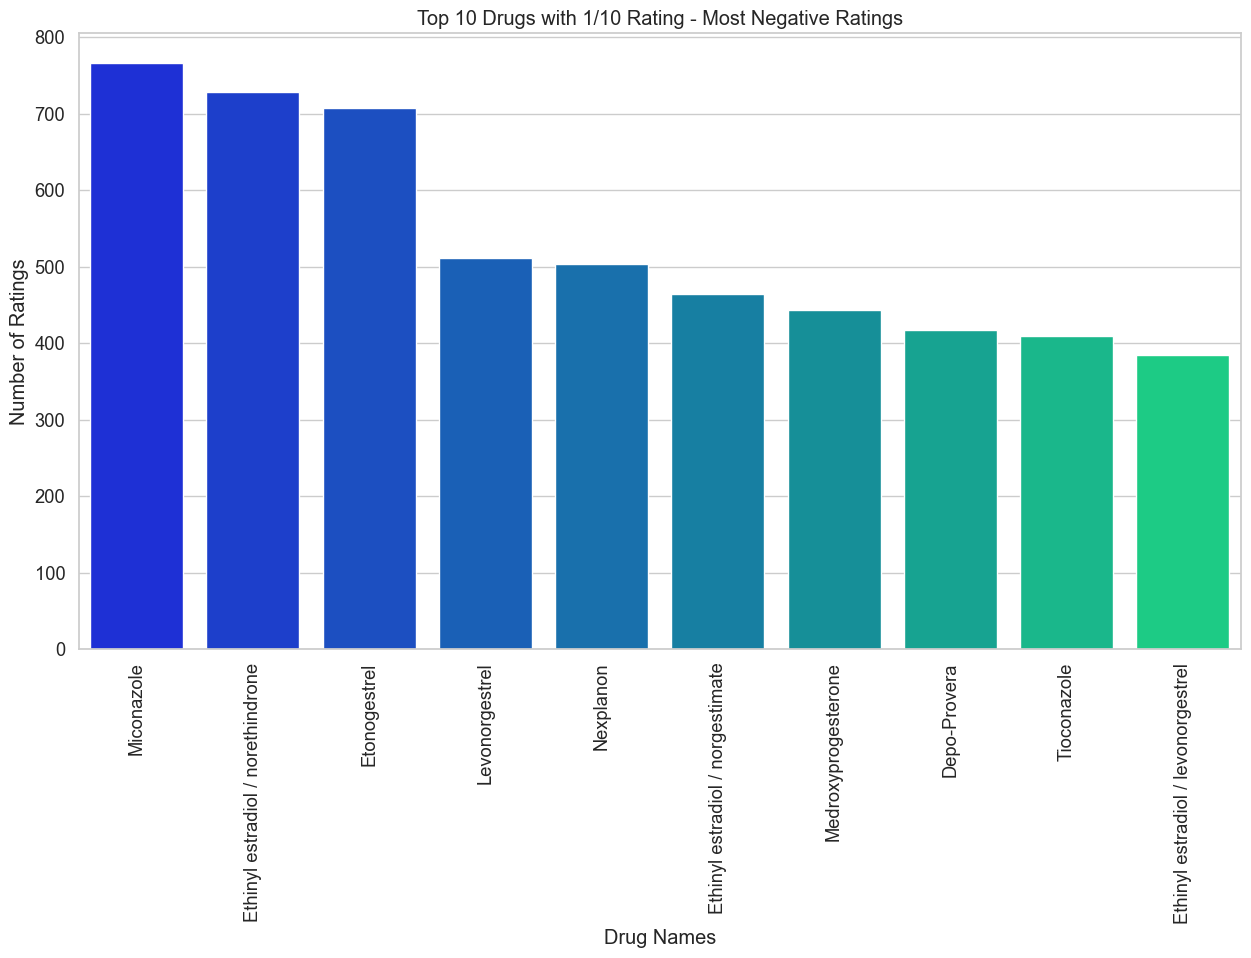

In [ ]:
#the barplot below shows the top 10 drugs with the '1/10' rating which basically shows us which drugs have received
#majorly negative ratings and reviews

#analysing the top 10 drugs with both 1/10 and 10/10 ratings:
#3 drugs appear (Levonorgestral, Etongestrel and Ethyl estradiol/ Norethindrone) in both the bottom 10 and top 10
#ratings.  Hence, there are mixed reviews on these 3 particular drugs. Which infers not all drug reviews are
#100% positive or negative

sb.set(font_scale = 1.2, style = 'whitegrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sb.barplot(x = drugname[0:10], y = drug_rating[0:10], palette = 'winter')

sns_rating.set(title = 'Top 10 Drugs with 1/10 Rating - Most Negative Ratings', ylabel = 'Number of Ratings', xlabel = "Drug Names")

plt.setp(sns_rating.get_xticklabels(), rotation=90);

**Preprocessing Steps** [8]:
    
**This is Step 1 in our feature extraction process**

The kind of data we receive from customer feedback or user reviews is usually unstructured. It contains noise; unusual text and symbols that require to be cleaned, so that a machine learning model can process it. Data cleaning and pre-processing are as important as building any sophisticated machine learning model. The reliability of our model is highly dependent upon the quality of our data. [9].

As stated above, the description is in textual format which is not suitable for machine learning, in it's current format (in other words, we need to extract numeric features so that we can use them to train and test classifiers). We can also say, machine learning algorithms learn from a pre-defined set of features from the training data, to produce an output for the test data.

As part of this task, we are expected to transform the textual description (review column) into a numeric feature matrix. One simple technique to do that is different embeddings, such as Term Frequency Inverse Document Frequency (TFIDF) and the Count Vectors (CV). Or apply, in Python using the sci-kit learn package. Before TF-IDF can be applied, we will need to clean up and prepare the textual data correctly. Here is a list of steps that we can apply to the review column before applying TF-IDF:

- Removing punctuations like . , ! $( ) * % @
- Removing URLs
- Removing Stop words
- Lower casing
- Tokenization
- Lemmatization
- Apply NGram Tokenization


In [ ]:
#increases the quality of generated features
#includes synsets, a collection of synonymous words

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/stephenmalcolm/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# function to preprocess a given text after applying several preprocessing functions

import re

wordnet_lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # lower case the text.It is one of the most common preprocessing steps where the text is converted into the same case preferably lower case
    text = text.lower()
    # Replacing the repeating pattern of &#039;
    text = text.replace("&#039;", "")
    # Removing all punctuation symboks from the text
    cleaned_text = "".join([i for i in text if i not in string.punctuation])
    # Removing all URLs from the text
    cleaned_text = re.sub(r'http\S+', '', cleaned_text)
    # Splitting the text into separate tokens. Each token is a word of the text.
    tokens = cleaned_text.split(" ")
    # All tokens that are also a stopword are filtered out as they are not really necessary for model building.
    filtered_tokens = [i for i in tokens if i not in stopwords]
    # Applying lemmatization to the tokens. It stems the word but makes sure that it does not lose its meaning.
    lemmatized_tokens = [wordnet_lemmatizer.lemmatize(word) for word in filtered_tokens]
    # Removing all symbols that are not alphanumeric. We will consider only alphanumeric symbols.
    sc_removed = [re.sub("[^a-zA-Z0-9]", ' ', token) for token in lemmatized_tokens]
    # Returning the preprocessed text
    return " ".join(sc_removed)

In [ ]:
#preprocess_text function is optimized to run more efficiently, to produce 'clean_review' feature below

data['clean_review'] = data['review'].progress_apply(lambda x: preprocess_text(x))
data.head()

  0%|                                                | 0/213869 [00:00<?, ?it/s]Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized

 60%|███████████████████▊             | 128449/213869 [00:35<00:23, 3574.86it/s]


uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                                                                                                                                                                                    review  \
0                                                                                                                          "It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"   
1  "My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get ou...   
2  "I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not ava...   
3  "This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is...   
4  "Suboxone has completely turned my life around.  I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account.  I had none of those before Suboxone an...   

   rating       date  usefulCount  sentiment  \
0       9  20-May-12           27          1   
1       8  27-Apr-10          192          1   
2       5  14-Dec-09           17          0   
3       8   3-Nov-15           10          1   
4       9  27-Nov-16           37          1   

                                                                                                                                                                                              clean_review  
0                                                                                                                                                      side effect take combination bystolic 5 mg fish oil  
1  son halfway fourth week intuniv became concerned began last week started taking highest dose two day could hardly get bed cranky slept nearly 8 hour drive home school vacation unusual called docto...  
2  used take another oral contraceptive 21 pill cycle happy light period max 5 day side effect contained hormone gestodene available u switched lybrel ingredient similar pill ended started lybrel imm...  
3  first time using form birth control im glad went patch 8 month first decreased libido subsided downside made period longer 56 day exact used period 34 day max also made cramp intense first two day...  
4  suboxone completely turned life around  feel healthier im excelling job always money pocket saving account  none suboxone spent year abusing oxycontin  paycheck already spent time got started reso...

In [ ]:
#lets look at the feature 'rating', to see if the majority of the customer ratings are positive or negative
#as a quick overview in the output below, the majority of the ratings are a '10' (highest rating)

#color=sb.color_palette()
#%matplotlib inline
#import plotly.offline as py
#py.init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.tools as tls
#import plotly.express as px

# Product Scores

#fig=px.histogram(data,x="rating")
#fig.update_traces(marker_color="turquoise", marker_line_color = 'rgb(8,48,107)', marker_line_width=1.5)
#fig.update_layout(title_text='Product Score')
#fig.show()

In [ ]:
#create sentiment feature from ratings [17]

#if rating > 5 sentiment = 1 (positive)
#if rating < 5 sentiment = 0 (negative)

data['sentiment'] = data["rating"].apply(lambda x: 1 if x > 5 else 0)
data.head()

uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                                                                                                                                                                                    review  \
0                                                                                                                          "It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"   
1  "My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get ou...   
2  "I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not ava...   
3  "This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is...   
4  "Suboxone has completely turned my life around.  I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account.  I had none of those before Suboxone an...   

   rating       date  usefulCount  sentiment  \
0       9  20-May-12           27          1   
1       8  27-Apr-10          192          1   
2       5  14-Dec-09           17          0   
3       8   3-Nov-15           10          1   
4       9  27-Nov-16           37          1   

                                                                                                                                                                                              clean_review  
0                                                                                                                                                      side effect take combination bystolic 5 mg fish oil  
1  son halfway fourth week intuniv became concerned began last week started taking highest dose two day could hardly get bed cranky slept nearly 8 hour drive home school vacation unusual called docto...  
2  used take another oral contraceptive 21 pill cycle happy light period max 5 day side effect contained hormone gestodene available u switched lybrel ingredient similar pill ended started lybrel imm...  
3  first time using form birth control im glad went patch 8 month first decreased libido subsided downside made period longer 56 day exact used period 34 day max also made cramp intense first two day...  
4  suboxone completely turned life around  feel healthier im excelling job always money pocket saving account  none suboxone spent year abusing oxycontin  paycheck already spent time got started reso...

In [ ]:
#we've now clasified ratings into positive and negative, 1 and 0 respectively

positive=data[data['sentiment']==1]
negative=data[data['sentiment']==0]

In [ ]:
#next we will be using n-gram tokenization with n=2 to find out the most frequently occuring n-grams in the
#review texts of people with both positive and negative reviews

##we explore n-grams, rather than words, so that we can consider word collocations

def count_ngrams(dataframe,column,begin_ngram,end_ngram):
    word_vectorizer = CountVectorizer(ngram_range=(begin_ngram,end_ngram), analyzer='word')
    sparse_matrix = word_vectorizer.fit_transform(dataframe[column].dropna())
    frequencies = sum(sparse_matrix).data
    most_common = pd.DataFrame(frequencies,
                               index=word_vectorizer.get_feature_names_out(),
                               columns=['frequency']).sort_values('frequency',ascending=False)
    most_common['ngram'] = most_common.index
    most_common.reset_index()
    return most_common

In [ ]:
#to limit memory consumption, we'll first randomly sample 20,000 negative reviews and perform n-gram tokenization
#please note that this is a memory intensive task and might take a lot of time to run.

#we can fine tune (increase n size) the n-gram tokenizer to optimize the accuracy of our models. However,
#this is computatationally expensive. Hence, we shall use bigrams (as opposed to trigrams) in this instance.
#we perform this, as two words together could represent more meaning, as oppposd to words on their own
#These bigrams could improve the prediction of positive or negative sentiment, over single word format

sample_df = negative.sample(20000)
two_grams = count_ngrams(sample_df,'clean_review', 2, 2)

fig = px.bar(two_grams.sort_values('frequency',ascending=False)[0:10].iloc[::-1],
             x="frequency",
             y="ngram",
             title='Most Common 2-gram words in negative reviews of people',
             orientation='h')
fig.show()

In [ ]:
#we will do the same for positive reviews

#no real inferences were made with the bigrams
#we possibly require to fine tune our n-gram tokenizer with bigger n-grams and/ or randomly sample more reviews
#to arrive at a conclusion. as this is computationaly expensive, we'll stop here.

sample_df = positive.sample(20000)
two_grams = count_ngrams(sample_df,'clean_review', 2, 2)

fig = px.bar(two_grams.sort_values('frequency',ascending=False)[0:10].iloc[::-1],
             x="frequency",
             y="ngram",
             title='Most Common 2-gram words in postive reviews of people',
             orientation='h')
fig.show()

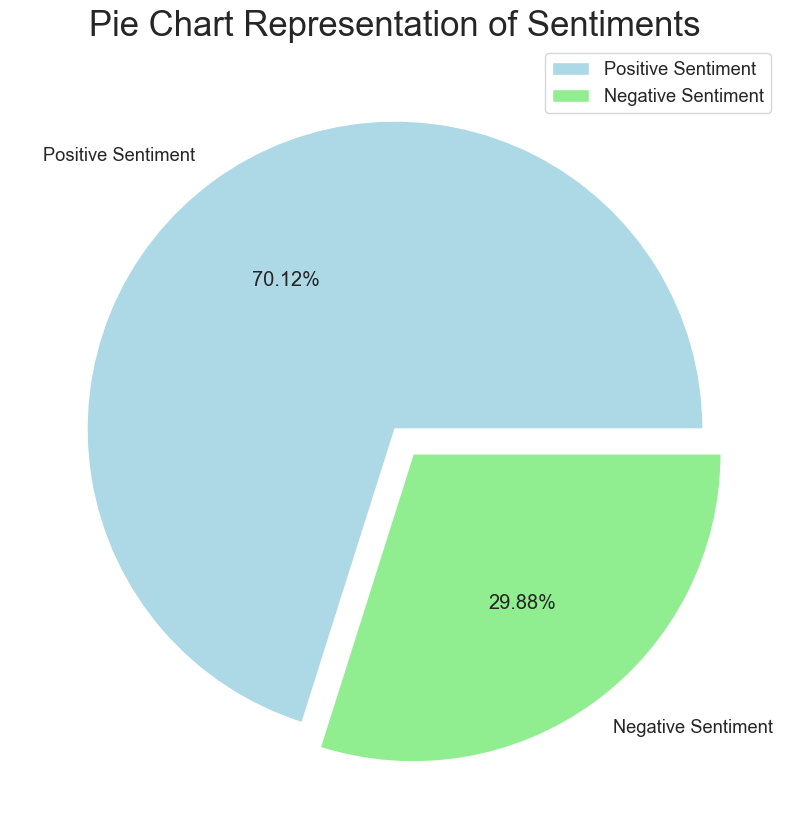

In [ ]:
# a pie chart to represent the distribution of sentiments of the reviews posted
#our dataset is imbalanced because just less than 30% of our reviews are considered as negative ones.
#this information will be very useful for the modelling part

size = [len(positive), len(negative)]
colors = ['lightblue', 'lightgreen']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 25)
plt.legend()
plt.show()

In [ ]:
# add number of characters column, for more exploration
data["nb_chars"] = data["clean_review"].apply(lambda x: len(x))

# add number of words column, for more exploration
data["nb_words"] = data["clean_review"].apply(lambda x: len(x.split(" ")))
data

uniqueID                  drugName                     condition  \
0         206461                 Valsartan  Left Ventricular Dysfunction   
1          95260                Guanfacine                          ADHD   
2          92703                    Lybrel                 Birth Control   
3         138000                Ortho Evra                 Birth Control   
4          35696  Buprenorphine / naloxone             Opiate Dependence   
...          ...                       ...                           ...   
213864    159999                 Tamoxifen     Breast Cancer, Prevention   
213865    140714              Escitalopram                       Anxiety   
213866    130945            Levonorgestrel                 Birth Control   
213867     47656                Tapentadol                          Pain   
213868    113712                 Arthrotec                      Sciatica   

                                                                                                                                                                                                         review  \
0                                                                                                                               "It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"   
1       "My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get ou...   
2       "I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not ava...   
3       "This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is...   
4       "Suboxone has completely turned my life around.  I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account.  I had none of those before Suboxone an...   
...                                                                                                                                                                                                         ...   
213864  "I have taken Tamoxifen for 5 years. Side effects are severe sweating and depression. I have been taking Effexor XR longer than I have been on Tamoxifen. My Oncologist increased the Effexor dosage...   
213865  "I&#039;ve been taking Lexapro (escitaploprgram) since February. First, I&#039;d like to mention that you can NOT take this drug for a week or less and expect to magically feel better; I felt real...   
213866  "I&#039;m married, 34 years old and I have no kids. Taking the pill was such a hassle so I decided to get the Mirena. It was very painful when it was inserted,then had cramping for the rest of tha...   
213867  "I was prescribed Nucynta for severe neck/shoulder pain. After taking only 2, 75mg pills I was rushed to the ER with severe breathing problems. I have never had any issues with pain medicines befo...   
213868                                                                                                                                                                                            "It works!!!"   

        rating       date  usefulCount  sentiment  \
0            9  20-May-12           27          1   
1            8  27-Apr-10          192          1   
2            5  14-Dec-09           17          0   
3            8   3-Nov-15           10          1   
4            9  27-Nov-16           37          1   
...        ...        ...          ...        ...   
213864      10  13-Sep-14           43          1   
213865       9   8-Oct-16           11          1   
213866       8  15-Nov-10            7          1   
213867       1  28-Nov-11       

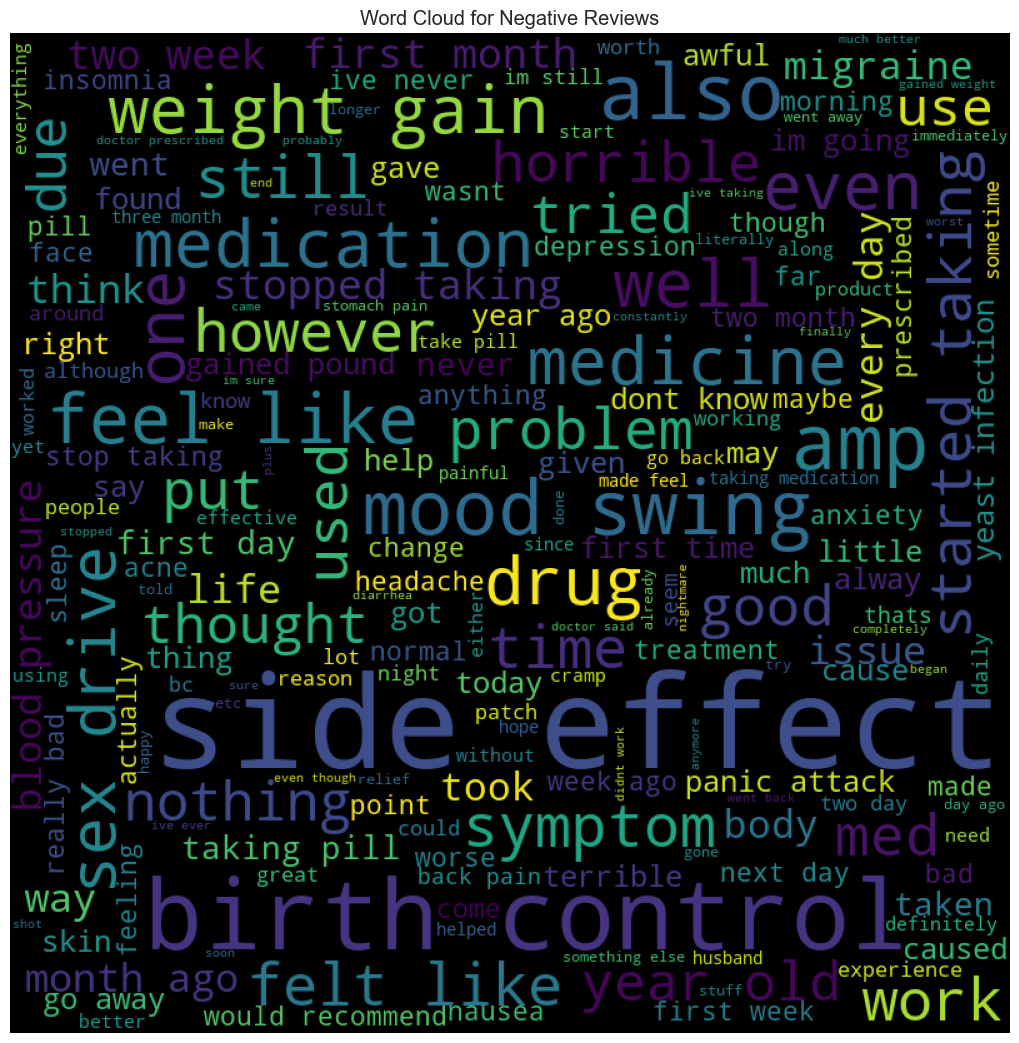

In [ ]:
# creating the word cloud for negative reviews
from wordcloud import WordCloud

# Creating the Word Cloud
final_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(' '.join(data[data['sentiment']==0]['clean_review']))


# Displaying the WordCloud
plt.figure(figsize = (10, 13), facecolor = None)
plt.title('Word Cloud for Negative Reviews')
plt.imshow(final_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

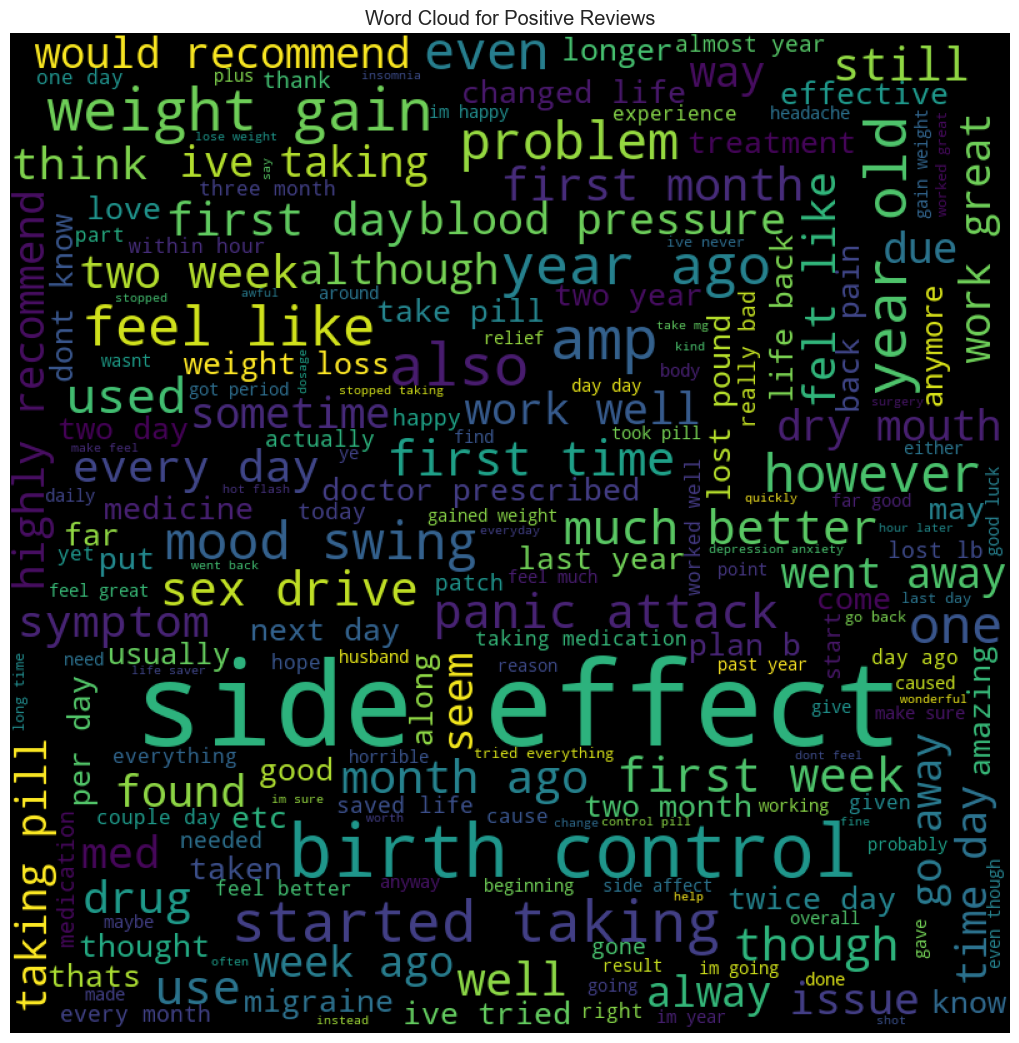

In [ ]:
# Creating the Word Cloud for positive reviews
final_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(' '.join(data[data['sentiment']==1]['clean_review']))


# Displaying the WordCloud
plt.figure(figsize = (10, 13), facecolor = None)
plt.title('Word Cloud for Positive Reviews')
plt.imshow(final_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

## Introduction to Large Language Models (LLMs)

In Part 1, we utilized traditional machine learning models (mostly ensemble methods) to address our NLP (sentiment analysis) task. Also, we utilzed basic techniques for our text classification approach i.e. TF-IDF Vectorization and Bag of Words. 

Here, in Part 2, we introduce LLMs.  Most teams and NLP practitioners will not be involved in the pre-training of LLMs, but rather in their fine-tuning and deployment. However, to successfully pick and use a model, it is important to understand what is going on “under the hood”. In this section, we will look at the basic ingredients of an LLM [10]:

- Training data (user-generated drug product reviews)
- Input representation
- Pre-training objective
- Model architecture (encoder-decoder)

Each of these will affect not only the choice, but also the fine-tuning and deployment of our LLM.

**Training Data**

The quality of the training data has a direct impact on model performance — and also on the required size of the model. If we are smart in preparing the training data, we can improve model quality while reducing its size. One example is the T0 model, which is 16 times smaller than GPT-3, but outperforms it on a range of benchmark tasks. Instead of just using any text as training data, it works directly with task formulations, thus making its learning signal much more focussed.

Note: We often hear that language models are trained in an unsupervised manner. While this makes them appealing, it is technically wrong. Instead, well-formed text already provides the necessary learning signals, sparing us the tedious process of manual data annotation. The labels to be predicted correspond to past and/or future words in a sentence. Thus, annotation happens automatically and at scale, making possible the relatively quick progress in the field.

**Input Representation**

Large Language Models (LLMs) work by taking an input text and repeatedly predicting the next token or word. The input representation in LLMs is typically based on embeddings, which are dense vector representations of words or tokens. These embeddings capture some of the semantics of the input by placing semantically similar inputs close together in the embedding space

**Pre-training Objective**

As a rule of thumb, the pre-training objective provides an important hint: autoregressive (AR) models perform well on text generation tasks such as conversational AI, question answering and text summarisation, while auto-encoders (AE) (such as BERT) excel at “understanding” and structuring language, for example for sentiment analysis (such as our task) and various information extraction tasks. Models intended for zero-shot learning can theoretically perform all kinds of tasks as long as they receive appropriate prompts — however, their accuracy is generally lower than that of fine-tuned models.

**Model Architecture**

The basic building blocks of a language model are the encoder and the decoder. The encoder transforms the original input into a high-dimensional algebraic representation, also called a “hidden” vector. The decoder reproduces the hidden representation in an intelligible form such as another language, programming code, an image etc.

Since the introduction of the attention-based Transformer model, traditional recurrence has lost its popularity while the encoder-decoder idea lives on. Most Natural Language Understanding (NLU) tasks rely on the encoder, while Natural Language Generation (NLG) tasks need the decoder and sequence-to-sequence transduction requires both components.

**Fine Tuning**

NLP is mostly used for more targeted downstream tasks such as sentiment analysis, question answering and information extraction. This is the time to apply transfer learning and reuse the existing linguistic knowledge for more specific challenges. During fine-tuning, a portion of the model is “freezed” and the rest is further trained with domain- or task-specific data.


### Introduction to Neuthink

NeuThink is experimental deep learning library built on top of PyTorch. Neuthink is a research project aimed to explore how the concept of differential programming can be implemented in context of Python language. One of definitions of differential programming is that it "enables programmers to write program sketches with slots that can be filled with behaviour trained from program input-output data".

Neuthink aims to simplify construction and usage of simple and moderately complex deep learning models, automating routine operations to allow the developer to focus on the task itself.

Neuthink is not a widely used library, but it was used in a number of research projects (example  and commercial projects with good results.

Installing libraries
1. Clone neuthink from github repository
2. Install pystemmer and reprint from pip
3. Install huggingface transformers

In the context of NLP, NeuThink can be used to build models for tasks such as sentiment analysis, natural language generation, paraphrasing, and summarization. However, it’s important to note that the choice of library can depend on many factors including the specific task at hand, the available data, computational resources, and personal preference [11].


In [6]:
# This code fetches a copy of the "neuthink" repository from GitHub and storing it on the local system. This
# allows us to work with the code and files from that repository on our own machine

!git clone https://github.com/meanotekai/neuthink

Cloning into 'neuthink'...
remote: Enumerating objects: 94, done.
remote: Total 94 (delta 0), reused 0 (delta 0), pack-reused 94
Receiving objects: 100% (94/94), 104.72 KiB | 439.00 KiB/s, done.
Resolving deltas: 100% (44/44), done.


In [7]:
# These libraries serve different purposes - pystemmer is used for text processing and analysis, while reprint
# is used for more controlled and organized output formatting.

!pip install pystemmer
!pip install reprint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.0/303.0 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystemmer: filename=PyStemmer-2.2.0.1-cp310-cp310-linux_x86_64.whl size=579706 sha256=6a7bb09b980bf64131b6900cdeeab627b727ed5d9137f28a422918780f944276
  Stored in directory: /root/.cache/pip/wheels/45/7d/2c/a7ebb8319e01acc5306fa1f8558bf24063d6cec2c02de330c9
Successfully built pystemmer


In [8]:
# This line of code is providing access to the functionalities defined in the neuthink.metastruct module. This
# means that any classes, functions, or variables defined in that module can now be used in the current Python
# script by referring to them as Struct.

import neuthink.metastruct as Struct

## Baseline Performance

We'll be employing a neural bag-of-words baseline approach for our research endeavor. To facilitate this, we require word embeddings data. Consequently, we will proceed to acquire word embeddings of dimension 100 through the download of Word2Vec embeddings. Additional information regarding Word2Vec embeddings can be accessed here [12].


In [9]:
# Load train and test set into neuthink data structures

data_nbow = Struct.LoadCSV('/content/drugsComTrain_raw.csv?dl=1').Shuffle()
test_nbow = Struct.LoadCSV('/content/drugsComTest_raw.csv?dl=1')

In [10]:
# This code snippet changes the current working directory to /content/neuthink/wordvectors/ and then downloads two
# files (vectors_en_100.txt and words_en_100.txt) from Dropbox. Finally, it renames these files to remove the
# ?dl=1 query parameter from their names, making them accessible for further processing within the specified
# directory.

%cd /content/neuthink/wordvectors/
!wget https://www.dropbox.com/s/7xuvry8y9k85fne/vectors_en_100.txt?dl=1
!wget https://www.dropbox.com/s/ancaj3976it1rr6/words_en_100.txt?dl=1
!mv ./vectors_en_100.txt?dl=1 vectors_en_100.txt
!mv ./words_en_100.txt?dl=1 words_en_100.txt

/content/neuthink/wordvectors
--2023-10-12 10:16:58--  https://www.dropbox.com/s/7xuvry8y9k85fne/vectors_en_100.txt?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/7xuvry8y9k85fne/vectors_en_100.txt [following]
--2023-10-12 10:16:58--  https://www.dropbox.com/s/dl/7xuvry8y9k85fne/vectors_en_100.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca12c416e062df1788023b5f786.dl.dropboxusercontent.com/cd/0/get/CFc81ei7Tjiwd0uExoE32COro1tEHq-_XLg1bLuzEL9Z-0SBcTEsOXfADbCOQR0P6XnLgPweQSzxOocKhNnNVLMhSZh66s9JcNMaJ6KiT2QOn43j3gxjV9240xaCMEAaJGt42ZeRqPIPTAvPbr707jB8/file?dl=1# [following]
--2023-10-12 10:16:59--  https://uca12c416e062df1788023b5f786.dl.dropboxusercontent.com/cd/0/get/CFc81ei7Tjiwd0uExoE32COro1tEHq-_XLg1bLuzEL9Z-0SBc

In [11]:
# We already converted rating 1-10 into a 2 class binary classification problem, for the data pre-processing and
# data transformation sections above. However, for simplicity, we'll create a new field called "tag". We consider
# a review to be positive if rating is higher than 4 (this is somewhat arbitrary choice, but seems reasonable)

def convert_to_binary_aux(value):
    if int(value['rating'])>4:
        return 'positive'
    else:
        return 'negative'

def convert_to_binary(data):
    for x in data:
        x['tag'] = convert_to_binary_aux(x)

In [12]:
convert_to_binary(data_nbow)
convert_to_binary(test_nbow)
data_nbow[0]

{'uniqueID': '29626', 'drugName': 'Topiramate', 'condition': 'Migraine Prevention', 'review': '"I was prepared for the basic side effects: Carbonated beverages not tasting right, and also some loss of appetite. I was put on 100mg from the get go. I also had the fairly common side effect of just feeling confused, though this wasn&#039;t all that severe and I was still able to do well in school. I also experienced tingling in my hands and feet, and though this was irritating, it was bearable. The real kicker for why I quit taking this medicine was when I began to have what felt like panic attacks and severe confusion, along with elevated heartbeat and dizziness. Also my fingers would move on their own and seem to get stuck sticking straight out and I had no control over it. "', 'rating': '5', 'date': '3-Jul-13', 'usefulCount': '67', 'id': '100245', 'tag': 'positive'}

In [ ]:
data_nbow.Distinct('tag') #Check if tags are calculated properly

['positive', 'negative']

In [ ]:
# The default model for text representation in Neuthink is the neural bag-of-words model, which streamlines the
#model formulation process. Internally, this model entails the creation of a Multilayer Perceptron (MLP) classifier
#comprising a single hidden layer with a size of 128, complemented by a softmax layer accommodating two classes

model = data_nbow.dMap(source='review',target='tag')

<class 'str'>
multipart
en
Loading word vectors...
2
c tag
tag target
modes dMap1 tag 161297


In [ ]:
# This code is configuring and preparing the model for training by setting specific parameters for the compilation
#process. It's part of the process of training a DL/ LLM for text representation using the
#neural bag-of-words approach in Neuthink.

func = model.compile(noreprint=True, avg_steps=300,weight_decay=0, test_data= test_nbow)

HEYHEY
Adam
None
len of the model 161297
split
 interation: 300   loss: 900000000000000  best loss: 900000000  lr: 0.01  acc: None53766 size of test set
 interation: 300   loss: 579.6595160067081  best loss: 579.6595160067081  lr: 0.01  acc: 0.749042145593869753766 size of test set
 interation: 300   loss: 563.3867243528366  best loss: 563.3867243528366  lr: 0.01  acc: 0.751404233158501753766 size of test set
 interation: 300   loss: 568.901473492384  best loss: 563.3867243528366  lr: 0.008  acc: 0.752836364989026553766 size of test set
 interation: 300   loss: 572.9260239303112  best loss: 563.3867243528366  lr: 0.0064  acc: 0.759792433880147353766 size of test set
 interation: 300   loss: 555.7710615694523  best loss: 555.7710615694523  lr: 0.0064  acc: 0.764907190417736153766 size of test set
 interation: 300   loss: 545.293255507946  best loss: 545.293255507946  lr: 0.0064  acc: 0.766450916936353853766 size of test set
 interation: 300   loss: 541.9439283311367  best loss: 541.9439

### Classification Approach


In [13]:
# The initial classification approach employs a logistic regression classifier with n-grams features. Specifically,
# we'll utilize both unigram and bigram features to enhance the model's discriminative capacity

data = Struct.LoadCSV('/content/drugsComTrain_raw.csv?dl=1').Shuffle()
test = Struct.LoadCSV('/content/drugsComTest_raw.csv?dl=1')

In [14]:
import neuthink.metatext as Text

In [ ]:
all_text = ' '.join(data[1:1000]['review'])
tokens = Text.Tokenize(all_text.lower())
bigrams = tokens.Text.Ngrams(size=2, clean=True) #clean=True means we skip punctuation when computing ngrams and size=2 specifies ngram size = 2 (bigrams)
bigrams = sorted([(bigrams[x], x) for x in bigrams],reverse=True)
unigrams = tokens.Text.Ngrams(size=1, clean=True)
unigrams = sorted([(unigrams[x], x) for x in unigrams],reverse=True)

In [ ]:
bigrams[0:10] # a list of tuples of (bigram_count_in_the_corpus, bigram text)

[(271, 'side effects'),
 (186, 'have been'),
 (149, 'the first'),
 (131, 'for the'),
 (108, 'have had'),
 (107, 'birth control'),
 (106, 'the only'),
 (83, 'for about'),
 (80, 'this medication'),
 (77, 'has been')]

In [ ]:
unigrams[0:10]

[(2693, 'and'),
 (2613, 'the'),
 (1676, '039'),
 (1254, 'for'),
 (1108, 'have'),
 (1070, 'was'),
 (844, 'this'),
 (806, 'but'),
 (778, 'had'),
 (662, 'that')]

In [ ]:
# The amalgamation of these lists culminates in the creation of a unified dictionary. While there are potential
# optimization strategies that could be employed to enhance the efficiency of this dictionary, it is noteworthy
# that the current implementation performs adequately for its intended purpose

ngrams = [x[1] for x in bigrams[:1000]] + [x[1] for x in unigrams[:1000]]

In [ ]:
# Let's check if everything is correct and sample ngrams from our dictionary

import random
[random.choice(ngrams) for i in range(0,10)]

['chest',
 'handle',
 'symptoms were',
 'every night',
 'dosage and',
 'side',
 'little',
 'ever',
 'working for',
 'pain from']

In [15]:
convert_to_binary(data)
convert_to_binary(test)

In [16]:
# The function in question facilitates the transformation of text into a bag-of-n-grams feature vector. It
#generates a new NumPy vector, sized at 2000 (equivalent to the length of the n-grams dictionary), initialized
#with zero values. Subsequently, it assigns ones to positions within the vector corresponding to the presence of
#the specified n-gram in the given text

import numpy as np
import torch
def features_func_vec(nodes,i,source, mode=None):
  text = nodes[i][source]
  vec = np.zeros(len(ngrams))
  for (i,x) in enumerate(ngrams):
    if x in text:
      vec[i]=1
  return torch.tensor(vec).float()

In [ ]:
# We define logistic regression linear classifier over our bag of features

data = data.VectorFeatures(funcname=features_func_vec, source='review',target='ngramfeatures').Classify(source='ngramfeatures', target='Classify1',class_target='tag')

2
c tag
tag target
modes Classify1 tag 161297


In [ ]:
# Model is trained with starting learning rate 0.01 (default), weight decay 0, using stochastic gradient descent
# with Adam algorithm and batch size of 50 (default). Accuracy on test set is calculated every 300 batches

f= data.compile(avg_steps=300, weight_decay=0, noreprint=True, test_data=test)

HEYHEY
Adam
None
len of the model 161297
split
 interation: 300   loss: 900000000000000  best loss: 900000000  lr: 0.01  acc: None53766 size of test set
 interation: 300   loss: 461.4314809292555  best loss: 461.4314809292555  lr: 0.01  acc: 0.814920209798013653766 size of test set
 interation: 300   loss: 476.203207090497  best loss: 461.4314809292555  lr: 0.008  acc: 0.817040508871777753766 size of test set
 interation: 300   loss: 448.8885887414217  best loss: 448.8885887414217  lr: 0.008  acc: 0.817710077000334853766 size of test set
 interation: 300   loss: 444.8070535361767  best loss: 444.8070535361767  lr: 0.008  acc: 0.819830376074098953766 size of test set
 interation: 300   loss: 469.90921315550804  best loss: 444.8070535361767  lr: 0.0064  acc: 0.819476992895138253766 size of test set
 interation: 300   loss: 437.85323698818684  best loss: 437.85323698818684  lr: 0.0064  acc: 0.824368560056541453766 size of test set
 interation: 300   loss: 438.39212857186794  best loss: 43

In [ ]:
data.test_set.F1('tag','Classify1','positive')

0.8921125074805507

In [ ]:
data.test_set.F1('tag','Classify1','negative')

0.6241347677424736

# BERT (Bidirectional Encoder Representations from Transformers)
### ###  Pre-trained transformer-based language model with broad, general knowledge across diverse topics, but it does not possess specialized expertise in any specific domain [13]

In 2018, BERT marked a new era of NLP. It was introduced as the first LLM on the basis of the new Transformer architecture. Since then, Transformer-based LLMs have gained strong momentum. Language modelling is especially attractive due to its universal usefulness. While many real-world NLP tasks such as sentiment analysis, information retrieval and information extraction do not need to generate language, the assumption is that a model that produces language also has the skills to solve a variety of more specialised linguistic challenges.

BERT is only an encoder, while the original transformer is composed of an encoder and decoder. Given that BERT uses an encoder that is very similar to the original encoder of the transformer, we can say that BERT is a transformer-based model [14].

In [17]:
#the transformers library provides several pretrained models and tools for natural language processing tasks. In the
#last line of code, the T5Tokenizer class and the T5ForConditionalGeneration class are imported,
#which are used to create and work with a text generation model using Google’s T5 architecture, one of the most
#powerful architectures for natural language processing currently available.

!pip install transformers
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 102.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.9 MB/s eta 0:00:00


In [18]:
data_bert = Struct.LoadCSV('/content/drugsComTrain_raw.csv?dl=1')#.Shuffle()
test_bert = Struct.LoadCSV('/content/drugsComTest_raw.csv?dl=1')

In [19]:
convert_to_binary(data_bert)
convert_to_binary(test_bert)

We will make a function to compute BERT features. For a deeper explanation of what BERT is, please see: Devlin, Jacob, et al. "Bert: Pre-training of deep bidirectional transformers for language understanding." arXiv preprint arXiv:1810.04805 (2018)[13]. 

We will import BERT from hugginface library and put it on a GPU (cuda:0) device, because computation is too slow otherwise. The function bert_vector computes feature vector by averaging outputs of layer 11 of BERT model (we use BERT-base, uncased version)

In [20]:
# Lets check the allocated GPU specs in Google Colab, we can use the !nvidia-smi command. This command will 
# display information about the GPU, including the memory usage, temperature, and clock speed
# We're using the premium Nvidia A100 GPU - nice

!nvidia-smi

Thu Oct 12 10:19:14 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    50W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
pip install torch torchvision -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 985.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 86.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [21]:
#Ensure we're utilising A100 Nvidia GPU (premium GPU) in Colab, from here onwards - Go to 'change runtime type' in Google Colab
#i.e. for all training and fine tuning.

#The LLMs are complex, hence the T4 GPU from Colab isn't powerful enough. Mac Silicon will also suffice.
#verification given above

from typing import List
import sys
import numpy as np
import torch #it's an open-source machine learning library widely used for creating and training deep learning models.
from transformers import BertTokenizer, BertModel
from transformers import logging

logging.set_verbosity_error()

# this part of the code creates BERT model
bertmodel = BertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#labels = torch.tensor([1]).unsqueeze(0).to('cuda:0')
bertmodel.to('cuda:0')

# We will make a function to compute BERT features. For explanation of what BERT is, please see: Devlin, Jacob,
#et al. "Bert: Pre-training of deep bidirectional transformers for language understanding." arXiv preprint
#arXiv:1810.04805 (2018) (https://arxiv.org/abs/1810.04805). We will import BERT from hugginface library and put
#it on GPU (cuda:0) device, because computation is too slow otherwise. The function bert_vector computes feature
#vector by averaging outputs of layer 11 of BERT model (we use BERT-base, uncased version)


def bert_vector(text:str):
   '''computes vector representation of text using BERT'''
   with torch.no_grad():
    text = text[0:1200]  #we truncate the text to first 1200 characters. This is somewhat arbitrary choice. Increasing this to 1200 will improve accuracy slows training down a lot
    inputs = tokenizer(text.lower(), return_tensors="pt").to('cuda:0')
    outputs = bertmodel(**inputs, output_hidden_states=True)
    q = outputs[2][11][0]
    return q.mean(dim=0).cpu().detach().numpy()

In [22]:
# By importing torch, we gain access to a wide range of functions, classes, and tools provided by PyTorch, allowing
# us to build, train, and deploy machine learning and deep learning models

import torch
def features_func_bert(nodes, i:int, source:str, mode:str=None):
    if len(nodes[i][source])==0:
        nodes[i][source]="None"
    tensor = torch.tensor(bert_vector(nodes[i][source])).float()
    #tensor.to('cuda:0')
    #tensor.requires_grad = False
    return tensor

In [23]:
b = bert_vector("Hello") #this is just to test if bert_vector is working. We can see vector data below:

In [24]:
# Actual model definition:

#1. Generates BERT features from text (review field) by calling callback function, features_func.
#2. The model itself is multi-layer perceptron, with one hidden layer (128 neurons) following softmax layer

model = data_bert.VectorFeatures(source='review',target='bert_features', funcname=features_func_bert).dMap(source='bert_features', target='hidden1',size=128).dMap(source='hidden1',target='tag')

<class 'torch.Tensor'>
bert_features
<class 'torch.Tensor'>
2
c tag
tag target
modes dMap1 tag 161297


In [25]:
#This code is setting up and configuring a model for training and evaluation. 
#The resulting func function holds important information/ configurations for later use when fine tuning BERT

func = model.compile(weight_decay=0, avg_steps=400, test_data=test_bert, noreprint=True)

HEYHEY
Adam
None
len of the model 161297
split
 interation: 400   loss: 900000000000000  best loss: 900000000  lr: 0.01  acc: None53766 size of test set
 interation: 400   loss: 398.32612600922585  best loss: 398.32612600922585  lr: 0.01  acc: 0.835211843916229653766 size of test set
 interation: 400   loss: 399.6939813196659  best loss: 398.32612600922585  lr: 0.008  acc: 0.831640813897258553766 size of test set
 interation: 400   loss: 452.43787057697773  best loss: 398.32612600922585  lr: 0.0064  acc: 0.817803072573745553766 size of test set
 interation: 400   loss: 378.9463605135679  best loss: 378.9463605135679  lr: 0.0064  acc: 0.84423241453706853766 size of test set
 interation: 400   loss: 378.853081792593  best loss: 378.853081792593  lr: 0.0064  acc: 0.846427110069560753766 size of test set
 interation: 400   loss: 375.29685531556606  best loss: 375.29685531556606  lr: 0.0064  acc: 0.844604396830710953766 size of test set
 interation: 400   loss: 406.85246047377586  best loss

In [26]:
model.test_set.F1('tag','dMap1','negative')

0.697929967111627

In [27]:
model.test_set.F1('tag','dMap1','positive')

0.9044278771407935

# XLNet (Extra-Long Neural Network)
###  Pre-trained transformer-based language model with broad, general knowledge across diverse topics, but it does not possess specialized expertise in any specific domain [15]

In [28]:
from transformers import XLNetModel, XLNetTokenizer
from transformers import AdamW

import torch
from transformers import get_linear_schedule_with_warmup
from sklearn.metrics import f1_score
from torch.utils.data import DataLoader, TensorDataset, random_split

In [29]:
xl_tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')
xl_model = XLNetModel.from_pretrained("xlnet-base-cased", num_labels=2)

In [30]:
xl_model.to('cuda:0')

def xl_vector(text:str):
   '''computes vector representation of text using BERT'''
   with torch.no_grad():
    text = text[0:1200]  #we truncate the text to first 1200 characters. This is somewhat arbitrary choice. Increasing this to 1200 will improve accuracy slows training down a lot
    inputs = xl_tokenizer(text.lower(), return_tensors="pt").to('cuda:0')
    outputs = xl_model(**inputs, output_hidden_states=True)
    q = outputs[2][11][0]
    return q.mean(dim=0).cpu().detach().numpy()

In [31]:
def features_func_xl(nodes, i:int, source:str, mode:str=None):
    if len(nodes[i][source])==0:
        nodes[i][source]="None"
    tensor = torch.tensor(xl_vector(nodes[i][source])).float()
    #tensor.to('cuda:0')
    #tensor.requires_grad = False
    return tensor

In [32]:
x = xl_vector("Hello") #this is just to test if bert_vector is working. We can see vector data below:

In [33]:
data_xl = Struct.LoadCSV('/content/drugsComTrain_raw.csv?dl=1').Shuffle()
test_xl = Struct.LoadCSV('/content/drugsComTest_raw.csv?dl=1')

In [34]:
convert_to_binary(data_xl)
convert_to_binary(test_xl)


In [35]:
model_xlnet = data_xl.VectorFeatures(source='review',target='xl_features', funcname=features_func_xl).dMap(source='xl_features', target='hidden1',size=128).dMap(source='hidden1',target='tag')

<class 'torch.Tensor'>
xl_features
<class 'torch.Tensor'>
2
c tag
tag target
modes dMap1 tag 161297


In [36]:
#This code is setting up and configuring a model for training and evaluation. 
#The resulting func function holds important information/ configurations for later use when fine tuning XLNet

func_xlnet = model_xlnet.compile(weight_decay=0, avg_steps=400, test_data=test_xl, noreprint=True)

HEYHEY
Adam
None
len of the model 161297
split
 interation: 400   loss: 900000000000000  best loss: 900000000  lr: 0.01  acc: None53766 size of test set
 interation: 400   loss: 369.2573320865631  best loss: 369.2573320865631  lr: 0.01  acc: 0.843879031358107453766 size of test set
 interation: 400   loss: 356.9330853968859  best loss: 356.9330853968859  lr: 0.01  acc: 0.857586578878845453766 size of test set
 interation: 400   loss: 350.43005039542913  best loss: 350.43005039542913  lr: 0.01  acc: 0.858144552319309653766 size of test set
 interation: 400   loss: 366.39970538020134  best loss: 350.43005039542913  lr: 0.008  acc: 0.84291187739463653766 size of test set
 interation: 400   loss: 352.02589912712574  best loss: 350.43005039542913  lr: 0.008  acc: 0.853215786928542253766 size of test set
 interation: 400   loss: 342.1401011198759  best loss: 342.1401011198759  lr: 0.008  acc: 0.86229215489342753766 size of test set
 interation: 400   loss: 342.03941844403744  best loss: 342.

In [37]:
model_xlnet.test_set.F1('tag','dMap1','negative')

0.7223954585432157

In [38]:
model_xlnet.test_set.F1('tag','dMap1','positive')

0.9158486633219419

# Fine Tuning BERT and XLnet
## Note that we can run this section independently from above sections
## After installing the "!pip install sentencepiece" library please go to Runtime>Restart Runtime

In [ ]:
conda install -c anaconda wget

Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized


Note: you may need to restart the kernel to use updated packages.


In [ ]:
!wget https://www.dropbox.com/s/wd35fbl314kcv6f/drugsComTest_raw.csv?dl=1
!wget https://www.dropbox.com/s/a7n2c8wtm9hu72w/drugsComTrain_raw.csv?dl=1

--2023-10-10 12:56:08--  https://www.dropbox.com/s/wd35fbl314kcv6f/drugsComTest_raw.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6022:18::a27d:4212, 162.125.66.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6022:18::a27d:4212|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/wd35fbl314kcv6f/drugsComTest_raw.csv [following]
--2023-10-10 12:56:09--  https://www.dropbox.com/s/dl/wd35fbl314kcv6f/drugsComTest_raw.csv
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc95221704fe5d5b8ab55ee66065.dl.dropboxusercontent.com/cd/0/get/CFXseUH3yjWAokf2zzjrwQY_W3taFYpb0HQhCEuSaGZO54bCW0kM9EnDNsvf7FhpTyO2CEjC9B-bQfr9k1ygd5HSjCH-y0BosdzFVy2Kjm_R3OzQ-PwgdOStL31C8ySQiiZo4OaVa_DOL7_6tbiBw9vG/file?dl=1# [following]
--2023-10-10 12:56:09--  https://uc95221704fe5d5b8ab55ee66065.dl.dropboxusercontent.com/cd/0/get/CFXseUH3yjWAokf2zzjrwQY_W3taFYpb0HQhCEuSaGZO54bCW0kM9EnDN

In [ ]:
!pip install sentencepiece
!pip install transformers

Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized

Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized



# Data Preparation

In [ ]:
#We're downsizing our DataFrame by a factor of 10, which is a two-dimensional tabular data structure commonly used 
#in data analysis. This function is helpful in the context of executing our Large Language Models (LLMs),
#for optimizing our workflow

#LLMs, especially large ones like XLNet or BERT, can be memory-intensive. Reducing the size of the DataFrame can 
#help manage memory usage, allowing us to work with larger models, hence faster computations

def reduce_dataframe_size(df, factor=10, random_seed=42):
    """
    Reduce the size of a DataFrame by the specified factor.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - factor (int): The factor by which to reduce the size. Default is 10.
    - random_seed (int): Seed for random sampling. Default is 42.

    Returns:
    - pd.DataFrame: A reduced-size DataFrame.
    """
    num_rows_to_keep = len(df) // factor
    return df.sample(n=num_rows_to_keep, random_state=random_seed)

In [ ]:
# This code reads data from two CSV files ('drugsComTrain_raw.csv' and 'drugsComTest_raw.csv') using pandas, and 
# stores the data in DataFrames named train_df and test_df respectively. These DataFrames are now available for 
#further data analysis and processing

import pandas as pd

import csv
train_df=pd.read_csv('drugsComTrain_raw.csv?dl=1')
test_df=pd.read_csv('drugsComTest_raw.csv?dl=1')

#train_df=pd.read_csv('/content/drugsComTrain_raw.csv?dl=1')
#test_df=pd.read_csv('/content/drugsComTest_raw.csv?dl=1')

In [ ]:
train_df = reduce_dataframe_size(train_df)
test_df = reduce_dataframe_size(test_df)

In [ ]:
train_df.head()

uniqueID         drugName           condition  \
4792      127888      Phentermine         Weight Loss   
142824    197702   Desvenlafaxine          Depression   
97316      40759       Leuprolide       Endometriosis   
21700     208098          Zyclara           Keratosis   
72063     161657  Diphenhydramine  Allergic Reactions   

                                                                                                                                                                                                         review  \
4792    "I started taking Phentermine just a little over a month ago weighing in at 307. My doctor started me out with half a 37.5 mg pill 2x a day. I immediately felt the medicine start working, the jitt...   
142824  "I have had depression for years due to situations that added to it continually.  I have tried every pill made to help.  Usually within 3 days I would take myself off them because of gaining weigh...   
97316   "I was actually surprised to learn I had stage 4 endometriosis along with 2 endometrioma&#039;s and a dermoid cyst. I had always had a poochy gut and severe menstrual cramps since I was 16. I am 2...   
21700   "Have used this for one week but began to have serious side-effects including hives all over my back, severe diarrhea, terrible cold/flu, headache, joint soreness.  I do have an autoimmune disorde...   
72063   "Experienced an allergic reaction during dinner at a new restaurant. Throat started itching terribly so we left and drove to the nearest pharmacy. Used Benadryl syrup because I thought it would wo...   

        rating       date  usefulCount  
4792        10  26-Nov-16           24  
142824      10  25-Jul-09           31  
97316        8  21-Dec-11           31  
21700        7  20-Jan-13           17  
72063       10  11-Apr-15           20

In [ ]:
#The code plays a crucial role in preparing the data for training our LLM for binary classification. It transforms 
#the raw ratings into labels (positive or negative) that can be used to train and evaluate the model's performance

def convert_to_binary_aux(value):
    if int(value.rating) > 4:
        return 'positive'
    else:
        return 'negative'

def convert_to_binary(data):
    data['tag'] = data.apply(convert_to_binary_aux, axis=1)

convert_to_binary(train_df)
convert_to_binary(test_df)

# Model Training

# BERT

# 1. Import Necessary Libraries:

In [ ]:
# Prerequisite before importing libraries, IF importing in Mac Silicon

#import torch
#import math
# this ensures that the current MacOS version is at least 12.3+
#print(torch.backends.mps.is_available())
# this ensures that the current current PyTorch installation was built with MPS activated.
#print(torch.backends.mps.is_built())

#If both commands return True, then PyTorch has access to the GPU

True
True


In [ ]:
# These libraries provide the necessary tools for working with BERT, training neural networks, handling data, and
#evaluating model performance. They are commonly used in natural language processing tasks and deep learning
#projects such as ours

from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import f1_score
from torch.utils.data import DataLoader, TensorDataset, random_split

# 2. Load the Pre-trained BERT Model and Tokenizer:

In [ ]:
#this code is setting up a pre-trained BERT model for the specific task of classifying sequences of text. The
#tokenizer is getting it ready to understand and process text data, and the model is being loaded and prepared for
#binary classification. It's also ensuring that the computations are done on a GPU if one is available, which can
#greatly speed up the process.

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2).to('cuda:0')
#('cuda:0') for Colab executions #('mps') for Mac Silicon executions

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

# 3. Prepare Data:

In [ ]:
# Tokenizing reviews
# Truncate reviews to the first 1200 characters

# Large Language Models (LLMs), such as BERT or XLNet, have a maximum token limit. For example, BERT can handle 
# sequences up to 512 tokens. By truncating the review to 1200 characters, we're ensuring that it fits within the 
# model's capacity

texts = train_df['review'].str[:1200].tolist()
inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True, max_length=512).to('cuda:0')

In [ ]:
#torch.cuda.empty_cache()

In [ ]:
# Converting 'positive' and 'negative' tags to binary labels
labels = torch.tensor((train_df['tag'] == 'positive').astype(int).values).to('cuda:0')

# Creating a DataLoader
dataset = TensorDataset(inputs['input_ids'], inputs['attention_mask'], labels)
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
train_dataloader = DataLoader(train_dataset, batch_size=25, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=25)


# 4. Training Setup:

In [ ]:
# This code block is preparing the tools needed to train a BERT model for a classification task. It sets up the
#loss function, optimizer, and learning rate scheduler. The loss function measures how well the model is doing,
#the optimizer adjusts the model's weights to improve performance, and the scheduler helps control the learning
#rate during training.

loss_fn = torch.nn.CrossEntropyLoss().to('cuda:0')
optimizer = AdamW(model.parameters(), lr=2e-5)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_dataloader))

# 5. Fine-Tuning BERT:
### We train model on our specific drug product reviews section and model becomes aware of our specific topic

In [ ]:
#This code is training a BERT model over three epochs. It iterates through batches of training data, computes the
#loss, and updates the model's parameters to improve its performance. It also keeps track of the time taken for
#each epoch
# As it's computationaly expensive, it took 824.82 seconds to execute (see output below)

num_epochs = 3
k=0
import time
for epoch in range(num_epochs):
    model.train()
    start_time = time.time()  # Record the start time
    for i, batch in enumerate(train_dataloader):
        input_ids, attention_mask, labels = [item.to('cuda:0') for item in batch]# This line of code takes the items in the batch (presumably input IDs, attention masks, and labels) and moves them to a specific device (likely a GPU) for faster computation.


        optimizer.zero_grad()# This clears the gradients of the model's parameters. Gradients are used during backpropagation to update the model's weights.

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        scheduler.step()
        print(i,len(train_dataloader))
    print(k)
    k=k+1
    elapsed_time = time.time() - start_time  # Calculate the elapsed time
    print(f"Time elapsed: {elapsed_time:.2f} seconds")

0 581
1 581
2 581
3 581
4 581
5 581
6 581
7 581
8 581
9 581
10 581
11 581
12 581
13 581
14 581
15 581
16 581
17 581
18 581
19 581
20 581
21 581
22 581
23 581
24 581
25 581
26 581
27 581
28 581
29 581
30 581
31 581
32 581
33 581
34 581
35 581
36 581
37 581
38 581
39 581
40 581
41 581
42 581
43 581
44 581
45 581
46 581
47 581
48 581
49 581
50 581
51 581
52 581
53 581
54 581
55 581
56 581
57 581
58 581
59 581
60 581
61 581
62 581
63 581
64 581
65 581
66 581
67 581
68 581
69 581
70 581
71 581
72 581
73 581
74 581
75 581
76 581
77 581
78 581
79 581
80 581
81 581
82 581
83 581
84 581
85 581
86 581
87 581
88 581
89 581
90 581
91 581
92 581
93 581
94 581
95 581
96 581
97 581
98 581
99 581
100 581
101 581
102 581
103 581
104 581
105 581
106 581
107 581
108 581
109 581
110 581
111 581
112 581
113 581
114 581
115 581
116 581
117 581
118 581
119 581
120 581
121 581
122 581
123 581
124 581
125 581
126 581
127 581
128 581
129 581
130 581
131 581
132 581
133 581
134 581
135 581
136 581
137 581
138 58

# 6. Evaluate on Validation Set and Compute F1 Score:

In [ ]:
#Evaluates a model's performance on a validation set by making predictions, computing the F1 score, and printing
#out the result

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in val_dataloader:
        input_ids, attention_mask, labels = [item.to('cuda:0') for item in batch]
        logits = model(input_ids, attention_mask=attention_mask).logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.cpu().numpy())

f1 = f1_score(all_labels, all_preds)
print(f"F1 Score on Validation Set: {f1}")


F1 Score on Validation Set: 0.922452293950467


# 7. Evaluate BERT on test set

In [ ]:
# Tokenizing reviews
# Truncate reviews to the first 1200 characters

# Prepares the test set by extracting and processing text snippets, converting them into a format suitable for the
#BERT model, and organizing them into batches for evaluation. It also handles the labels, converting them into a
#binary format (0 or 1) for evaluation.

test_texts = test_df['review'].str[:1200].tolist()
test_inputs = tokenizer(test_texts, return_tensors="pt", padding=True, truncation=True, max_length=512).to('cuda:0')

# Converting 'positive' and 'negative' tags to binary labels
test_labels = torch.tensor((test_df['tag'] == 'positive').astype(int).values).to('mps')

# Creating a DataLoader
test_dataset = TensorDataset(test_inputs['input_ids'], test_inputs['attention_mask'], test_labels)

test_dataloader = DataLoader(test_dataset, batch_size=25)

In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_dataloader:
        input_ids, attention_mask, labels = [item.to('cuda:0') for item in batch]
        logits = model(input_ids, attention_mask=attention_mask).logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.cpu().numpy())

f1 = f1_score(all_labels, all_preds)
print(f"F1 Score on Test Set: {f1}")


F1 Score on Test Set: 0.9240948813982522


# XLnet

# 1. Import Necessary Libraries:

In [ ]:
# These libraries and components provide the necessary tools for working with XLNet, training neural networks,
#handling data, and evaluating model performance. They are commonly used in natural language processing tasks and
#deep learning projects such as ours

from transformers import XLNetModel, XLNetTokenizer, XLNetForSequenceClassification
from transformers import AdamW

import torch
from transformers import get_linear_schedule_with_warmup
from sklearn.metrics import f1_score
from torch.utils.data import DataLoader, TensorDataset, random_split

# 2. Load the Pre-trained XLnet Model and Tokenizer:

In [ ]:
#this code is setting up a powerful language model (XLNet) for the specific task of classifying sequences of text.
#The tokenizer is getting it ready to understand and process text data, and the model is being loaded and prepared
#for binary classification. It's also ensuring that the computations are done on a GPU if one is available, which
#can greatly speed up the process.

tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')
model = XLNetForSequenceClassification.from_pretrained("xlnet-base-cased", num_labels=2).to('cuda:0')

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.bias', 'lm_loss.weight']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.weight', 'logits_proj.weight', 'sequence_summary.summary.bias', 'logits_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

# 3. Prepare Data:

In [ ]:
# Tokenizing reviews
# Truncate reviews to the first 1200 characters
# Large Language Models (LLMs), such as BERT or XLNet, have a maximum token limit. For example, BERT can handle 
# sequences up to 512 tokens. By truncating the review to 1200 characters, we're ensuring that it fits within the 
# model's capacity

texts = train_df['review'].str[:1200].tolist()
inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True, max_length=512).to('cuda:0')

In [ ]:
# Converting 'positive' and 'negative' tags to binary labels
labels = torch.tensor((train_df['tag'] == 'positive').astype(int).values).to('cuda:0')

# Creating a DataLoader
dataset = TensorDataset(inputs['input_ids'], inputs['attention_mask'], labels)
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
train_dataloader = DataLoader(train_dataset, batch_size=25, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=25)


# 4.Training setup

In [ ]:
# This code block is preparing the tools needed to train a large language model (XLNet) for a classification task.
# It sets up the loss function, optimizer, and learning rate scheduler. The loss function measures how well the
# model is doing, the optimizer adjusts the model's weights to improve performance, and the scheduler helps control
# the learning rate during training

loss_fn = torch.nn.CrossEntropyLoss().to('cuda:0')
optimizer = AdamW(model.parameters(), lr=2e-5)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_dataloader))

# 5. Fine-Tuning XLnet:
### We train our model on our specific drug product reviews section, and the model becomes aware of our specific topic

In [ ]:
# This code is training a large language model (XLNet) for a specific task over three epochs. It iterates through
# batches of training data, computes the loss, and updates the model's parameters to improve its performance. It
# also keeps track of the time taken for each epoch.
# As it's computationaly expensive, it took 2211.96 seconds to execute (see output below)

num_epochs = 3
k=0
import time
for epoch in range(num_epochs):# This line starts a loop that will run for the specified number of epochs (in this case, 3). Each iteration represents one pass through the entire dataset
    model.train()
    start_time = time.time()  # Record the start time
    for i, batch in enumerate(train_dataloader):# This starts a loop that iterates through the batches of data in the training dataloader. Each batch contains input data, attention masks, and labels
        input_ids, attention_mask, labels = [item.to('cuda:0') for item in batch]

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        scheduler.step()
        print(i,len(train_dataloader))
    print(k)
    k=k+1
    elapsed_time = time.time() - start_time  # Calculate the elapsed time
    print(f"Time elapsed: {elapsed_time:.2f} seconds")

0 581
1 581
2 581
3 581
4 581
5 581
6 581
7 581
8 581
9 581
10 581
11 581
12 581
13 581
14 581
15 581
16 581
17 581
18 581
19 581
20 581
21 581
22 581
23 581
24 581
25 581
26 581
27 581
28 581
29 581
30 581
31 581
32 581
33 581
34 581
35 581
36 581
37 581
38 581
39 581
40 581
41 581
42 581
43 581
44 581
45 581
46 581
47 581
48 581
49 581
50 581
51 581
52 581
53 581
54 581
55 581
56 581
57 581
58 581
59 581
60 581
61 581
62 581
63 581
64 581
65 581
66 581
67 581
68 581
69 581
70 581
71 581
72 581
73 581
74 581
75 581
76 581
77 581
78 581
79 581
80 581
81 581
82 581
83 581
84 581
85 581
86 581
87 581
88 581
89 581
90 581
91 581
92 581
93 581
94 581
95 581
96 581
97 581
98 581
99 581
100 581
101 581
102 581
103 581
104 581
105 581
106 581
107 581
108 581
109 581
110 581
111 581
112 581
113 581
114 581
115 581
116 581
117 581
118 581
119 581
120 581
121 581
122 581
123 581
124 581
125 581
126 581
127 581
128 581
129 581
130 581
131 581
132 581
133 581
134 581
135 581
136 581
137 581
138 58

# 6. Evaluate XLnet on Validation Set and Compute F1 Score:

In [ ]:
# Evaluates model's performance on a validation set by making predictions, computing the F1 score, and printing
# out the result

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in val_dataloader:
        input_ids, attention_mask, labels = [item.to('cuda:0') for item in batch]
        logits = model(input_ids, attention_mask=attention_mask).logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.cpu().numpy())

f1 = f1_score(all_labels, all_preds)
print(f"F1 Score on Validation Set: {f1}")

F1 Score on Validation Set: 0.9417040358744393


# 7. Evaluate XLnet on test set

In [ ]:
# Tokenizing reviews
# Truncate reviews to the first 1200 characters

test_texts = test_df['review'].str[:1200].tolist()
test_inputs = tokenizer(test_texts, return_tensors="pt", padding=True, truncation=True, max_length=512).to('cuda:0')

# Converting 'positive' and 'negative' tags to binary labels
test_labels = torch.tensor((test_df['tag'] == 'positive').astype(int).values).to('cuda:0')

# Creating a DataLoader
test_dataset = TensorDataset(test_inputs['input_ids'], test_inputs['attention_mask'], test_labels)

test_dataloader = DataLoader(test_dataset, batch_size=25)

In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_dataloader:
        input_ids, attention_mask, labels = [item.to('cuda:0') for item in batch]
        logits = model(input_ids, attention_mask=attention_mask).logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.cpu().numpy())

f1 = f1_score(all_labels, all_preds)
print(f"F1 Score on Test Set: {f1}")


F1 Score on Test Set: 0.9312766491096062


## Results

Our Baseline Performance helped us decide on a modelling strategy for a LLM. We employed a neural bag-of-words baseline approach for our research endeavor. Acquiring word embeddings of dimension 100 through the download of Word2Vec embeddings. Then, for the classification approach, we employed a logistic regression classifier with n-grams features.  After training this model, we achieved 0.83 accuracy.  However, as performance was generally weak, we built a more complex, bigger, robust model.

Out of all the methods and the models we trained and tested in Part 1, the Random Forest Classifier provided the best results, with a F1 score of ~0.90.  

Here, in Part 2, we trained and tested Large Language Models (as opposed to Machine Learning models in Part 1). BERT and XLNet LLMs were specifically assigned, as they are highly appropiate for text classification or sentiment analysis tasks, such as ours.

| Model | Core Differentiator        | Pre-training Objective | Parameters | Access     |
|-------|----------------------------|------------------------|------------|------------|
| BERT  | First Transformer Based LLM| AE                     | 370M       | Source Code|
|XLNet  | Joint AE and AR            | AE and AR              | 110M       | Source Code|


XLNet has a similar architecture to BERT. However, the major difference comes in it’s approach to pre-training.

To summarise the performances:

F1 scores for the 2 models presented in the notebook
(models trained on 10-th of dataset)
BERT as both feature extractor and classifier - 0.92
XLnet as both feature extractor and classifier - 0.93

Out of all the methods and the models in Part 1 and Part 2, XLNet provided the best results as both feature extractor and classifier, with a F1 score of 0.93.  This hugely improves on our baseline score of 0.83, and outperforms the Machine Learning model (Random Forest) from Part 1. 

This score is generally considered excellent for sentiment analysis tasks, especially when using a powerful model like XLNet. An F1 score of 1.0 represents perfect precision and recall, so a score of 0.93 indicates very high accuracy, precision, and recall in classifying sentiments for our drug product user reviews.

An F1 score above 0.9 is often indicative of a highly effective model in sentiment analysis. However, it's important to note that the specific context and requirements of the task can influence what constitutes a "good" F1 score. Additionally, it's recommended to consider other evaluation metrics and conduct thorough testing to ensure the model's performance is consistent across different datasets and scenarios.


### Summary and Conclusions

**Pre-Processing Text**

We're using BERT's and XLNet's tokenizer directly instead of the 'clean_review' column from Part 1. Hence, there's no pre-processing steps to clean vocabularly.

Built-in Tokenization: BERT and XLNet comes with its own specialized tokenizer. It's designed to handle many of the preprocessing tasks we typically manually implement, like converting text to lowercase (for certain model variants) or removing special characters.

WordPiece Tokenization: BERT's tokenizer uses something called "WordPiece tokenization." What's great about this is that it breaks down words into smaller chunks. So, even if a word isn't in BERT's predefined vocabulary, its smaller pieces probably are. This makes BERT robust and capable of understanding a vast range of words without needing them explicitly in its vocabulary.

Contextual Understanding: BERT analyzes text bidirectionally. This means it understands the context by looking at words before and after a target word, making it super smart in grasping nuanced meanings.

So, when we use BERT and XLNet, we often rely on its tokenizer directly on raw text, bypassing the typical preprocessing steps like our 'clean_review' function from Part 1. This doesn't mean preprocessing is irrelevant, but BERT and XLNet's design allows it to handle raw text quite efficiently. 

**When Should We Use a Machime Learning Model i.e. Random Forest Versus a Large Language Model i.e BERT/ XLNet?**

The Random Forest algorithm (best performimg model from Part 1) presents computational advantages in terms of training efficiency and does not necessitate GPU-accelerated processing for completion. It offers an alternative interpretation of decision trees while demonstrating superior performance.

In contrast, Neural Networks or LLMs such as BERT and XLNet demand a substantial volume of data, potentially surpassing what is readily available to a typical practitioner for achieving optimal efficacy. However, it is imperative to note that Neural Networks or LLMs can significantly reduce the interpretability of features, potentially leading to a diminishment in their substantive relevance for the sake of performance optimization. This consideration, of course, is contingent upon the specific characteristics and requirements of each individual project, and healthcare business.

If the primary objective is the establishment of a predictive model with minimal concern for the intricate interplay of variables, the deployment of a neural network or LLM is advisable; however, it necessitates substantial computational resources, and is of course time and cost-intensive.

Conversely, in cases where a comprehensive comprehension of the contributing variables is imperative, a customary outcome is a modest compromise in model performance to ensure an elucidation of the individual variable contributions to the predictive model.

Ultimately, the decision taken by the healthcare business should be based on the specific nature of our data, the complexity of the task, available resources, and the business requirements for transparency and interpretability. 

This same method can be easily transferred to problems of different healthcare scenarios, as the methods used here are quite generalized and is not specific to work on drug reviews data only. We could also implement this model to measure patients perceptions about the care and treatment they receive and the kinds of services they want and make more personalised healthcare plans on patients prior experience.

This implementation was done using python but this can very well be reproduced in a different programming language like R. However, since Python offers a wide range of libraries and modules, it is easier to work on and even reproduce the results on different systems.

Overall, we have met our objective. Which was to review sentiment based on these drug user reviews text, using a supervised binary text classifier, which classified the user reviews as positive or negative. The overall satisifaction leaning more to the positive side.

By analyzing the sentiment expressed in online drug reviews, healthcare providers and manufacturers can gain a more comprehensive understanding of the strengths and weaknesses of their products. This information can inform product development and improvement efforts, and help to ensure that products meet the needs and expectations of patients and consumers.  
 

## References

[1] Sentiment Analysis of User-Generated Content on Drug Review Websites
https://www.researchgate.net/publication/277625450_Sentiment_Analysis_of_User-Generated_Content_on_Drug_Review_Websites

[2] Classifying Drug Ratings Using User Reviews with Transformer-Based Language Models
https://www.medrxiv.org/content/10.1101/2021.04.15.21255573v2.full

[3] Analysis of the effect of sentiment analysis on extracting adverse drug reactions from tweets and forum posts
https://www.sciencedirect.com/science/article/pii/S1532046416300508

[4] A Gentle Introduction To Text Classification And Sentiment Analysis, Miguel González-Fierro
https://miguelgfierro.com/blog/2017/a-gentle-introduction-to-text-classification-and-sentiment-analysis/

[5] UCI ML Drug Review dataset
https://www.kaggle.com/jessicali9530/kuc-hackathon-winter-2018?select=drugsComTest_raw.csv

[6] https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1
Multi-Class Metrics Made Simple, Part II: the F1-score

[7] How to Calculate Precision, Recall, and F-Measure for Imbalanced Classification
https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/

[8] Text Preprocessing in NLP with Python codes
https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/

[9] Importance of Text Pre-processing
https://www.pluralsight.com/guides/importance-of-text-pre-processing

[10] Choosing the right language model for your NLP use case - A guide to understanding, selecting and deploying Large Language Models
https://towardsdatascience.com/choosing-the-right-language-model-for-your-nlp-use-case-1288ef3c4929

[11] Neuthink Github Repository
https://github.com/meanotekai/gapresolution

[12] word2vec
https://code.google.com/archive/p/word2vec/

[13] Hugging Face/ BERT LLM
https://huggingface.co/docs/transformers/model_doc/bert

[14] BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding
https://arxiv.org/abs/1810.04805

[15] Hugging Face/ XLNet LLM
https://huggingface.co/docs/transformers/model_doc/xlnet

